<font face = "Time New Roman" size = 6>Import need pacages</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

<font face = "Time New Roman" size = 6>1. Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

part3_result.csv is the file without deleting the Non registered organizations 
It's used to compare the result
All the file need be modified manumally before importing

In [2]:
#Orginal_data = pd.read_csv('./Original_dataset.csv',encoding = "ISO-8859-1")
#Causes_data = pd.read_csv('./Original_Causes.csv',encoding = "ISO-8859-1")

In [3]:
#combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign Id']) #Combined data set
#combined_data.to_csv('New_original_combined_data.csv', index=None)


In [4]:
# Here need change the csv file from part3_result a little bit 
# Delete the space front and end of Campaign_Goal manually
# Change the number into number type instead of accounting type
# Or it can be changed into numeric number
combined_data = pd.read_csv('./New_original_combined_data.csv',encoding = "ISO-8859-1")
#combined_data = pd.read_csv('./Final_data.csv',encoding = "ISO-8859-1")

In [5]:
columns_name = combined_data.columns

In [6]:
columns_name

Index(['Campaign_Id*', 'Campaign_Title_x', 'Receiving_NPO Name*',
       'Receiving_NPO Id*', 'NPO_Status*',
       'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access*', 'Creator_Type*', 'Creator_Id*',
       'Campaign_Status*', 'Actual_Donation_Amount', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Image1_Id',
       'Campaign_Image2_Id', 'Campaign_Image3_Id', 'Campaign_Image4_Id',
       'Campaign_Image5_Id', 'Campaign_Video', 'Impact_Message_1',
       'Impact_Message_2', 'Impact_Message_3', 'Impact_Message_4',
       'Impact_Message_5', 'Custom_Amount_1', 'Custom_Amount_2',
       'Custom_Amount_3', 'Custom_Amount_4', 'Description_of_Campaign',
       'Description_of_NPO', 'Campaign_Title_y', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_&_Heritage', 'Org_Cause

In [7]:
# change the columns name
update_columns_name = []
for i in range(len(columns_name)):
    combined_data = combined_data.rename(columns={columns_name[i]:columns_name[i].replace(" ","_")})
    combined_data = combined_data.rename(columns={columns_name[i]:columns_name[i].replace("*","")})


<AxesSubplot: >

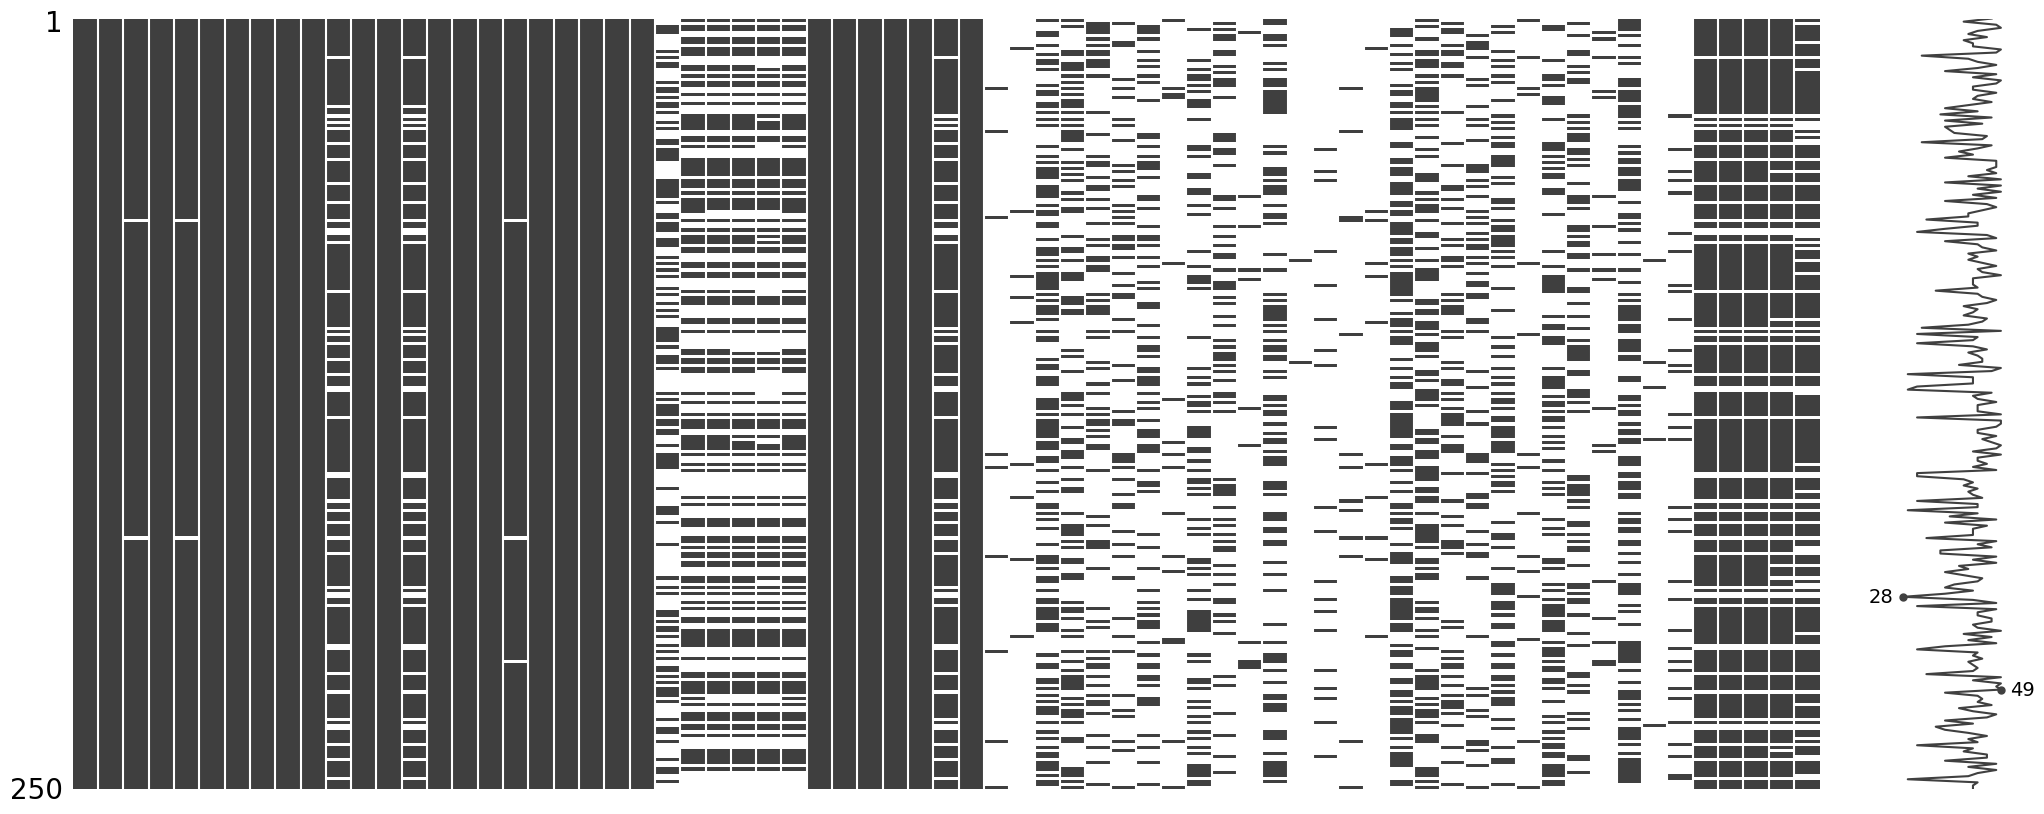

In [8]:
msno.matrix(combined_data.sample(250))

In [9]:
combined_data.columns #Show the columns of data set

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name*',
       'Receiving_NPO_Id*', 'NPO_Status',
       'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status', 'Actual_Donation_Amount', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Image1_Id',
       'Campaign_Image2_Id', 'Campaign_Image3_Id', 'Campaign_Image4_Id',
       'Campaign_Image5_Id', 'Campaign_Video', 'Impact_Message_1',
       'Impact_Message_2', 'Impact_Message_3', 'Impact_Message_4',
       'Impact_Message_5', 'Custom_Amount_1', 'Custom_Amount_2',
       'Custom_Amount_3', 'Custom_Amount_4', 'Description_of_Campaign',
       'Description_of_NPO', 'Campaign_Title_y', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_&_Heritage', 'Org_Cause_Child

In [10]:
extract_data = combined_data #[Need_variable]
extract_data

,Campaign_Id,Campaign_Title_x,Receiving_NPO_Name*,Receiving_NPO_Id*,NPO_Status,Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month,Public_Campaign_Access,Creator_Type,Creator_Id,Campaign_Status,...,Cam_Cause_Health,Cam_Cause_Humanitarian,Cam_Cause_Social_Service,Cam_Cause_Sports,Cam_Cause_Women_&_Girls,Pub_Enquiry_Person,Pub_Enquiry_Contact,Pub_Enquiry_Email,Web_URL,Facebook_Link
0,4608063,World Suicide Prevention Day 2017,Samaritans of Singapore,3102869,True,1,1,NPO,3102869,ENDED,...,NaN,NaN,Social Service,NaN,NaN,Sandra Wee,6221 2122,comms@sos.org.sg,www.sos.org.sg,SamaritansofSingapore
1,4648574,Enabling Lives,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,NPO,3105759,ENDED,...,NaN,NaN,NaN,NaN,NaN,Melissa Tan,6579 0794,melissa_tan@spd.org.sg,www.spd.org.sg,SPDSingapore
2,4661665,SPD Charity Hongbao 2017,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,NPO,3105759,ENDED,...,NaN,NaN,NaN,NaN,NaN,Melissa Tan,6579 0794,melissa_tan@spd.org.sg,www.spd.org.sg,SPDSingapore
3,4716038,Sundown Run 2017 - Running 4 HFH,Habitat for Humanity Singapore Ltd,3706352,True,2,1,INDIVIDUAL,4614452,ENDED,...,NaN,Humanitarian,Social Service,NaN,NaN,Habitat for Humanity Singapore,67447326,info@habitat.org.sg,www.habitat.org.sg,HabitatSG
4,4729527,Child For Child,Children's Cancer Foundation,3105049,False,2,1,INDIVIDUAL,4697816,ENDED,...,NaN,NaN,NaN,NaN,NaN,Fundraising Team,62293701,fundraising@ccf.org.sg,www.ccf.org.sg,sgccf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,81620010,#EndowusGivesBack to Gardens by the Bay,Gardens by the Bay,44329126,True,2,1,Corporate,67580280,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,Gardens by the Bay,64206848,feedback@gardensbythebay.com.sg,www.gardensbythebay.com.sg,gardensbythebay
15975,81633179,Support Loke Chui Yee in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,INDIVIDUAL,63267540,ACTIVE,...,Health,NaN,NaN,NaN,NaN,SingHealth Polyclinics Development Office,63507549,givingtoshp@singhealth.com.sg,Polyclinic.singhealth.com.sg,NaN
15976,81633303,Support Derek Tse in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,INDIVIDUAL,63267540,ACTIVE,...,Health,NaN,NaN,NaN,NaN,SingHealth Polyclinics Development Office,63507549,givingtoshp@singhealth.com.sg,Polyclinic.singhealth.com.sg,NaN
15977,81635547,WE@SG Trivia Night,Daughters Of Tomorrow Limited,3675791,True,4,1,INDIVIDUAL,81631190,ACTIVE,...,NaN,NaN,Social Service,NaN,Women & Girls,Jonathan Tan,81183663,donorrelations@DaughtersOfTomorrow.com,www.daughtersoftomorrow.org/,daughtersoftomorrow


<AxesSubplot: >

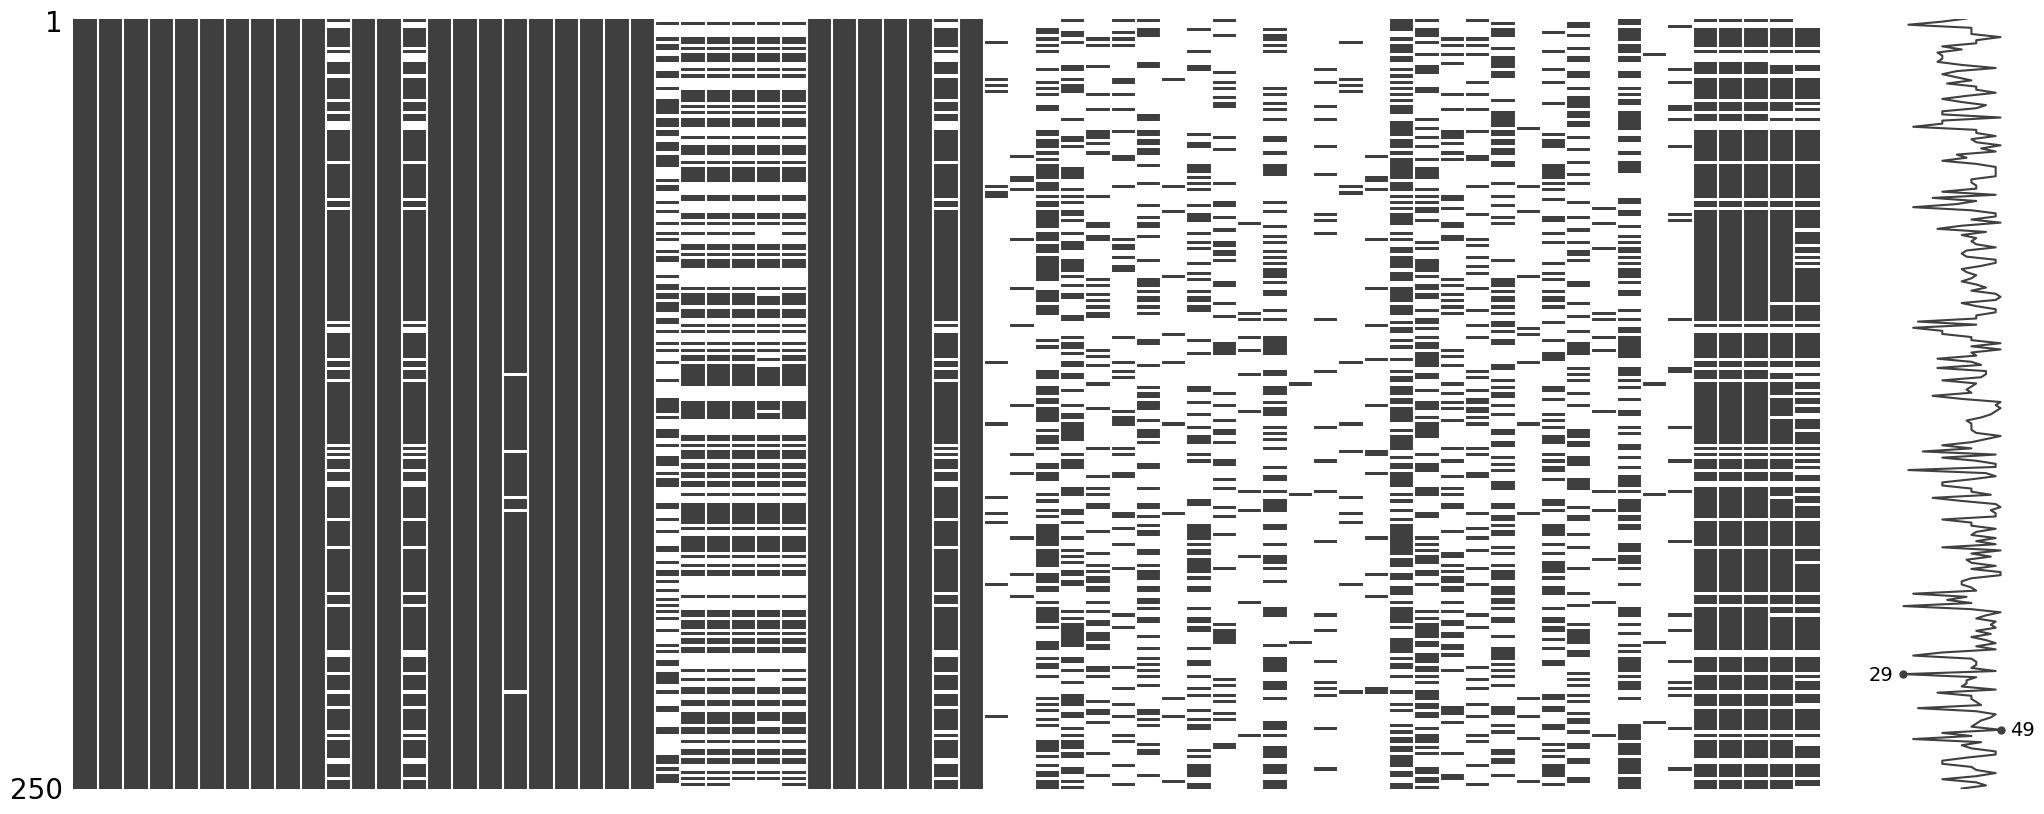

In [11]:
msno.matrix(extract_data.sample(250))

In [12]:
extract_data = extract_data.fillna('0')  #fill some missing causes data with 0

<AxesSubplot: >

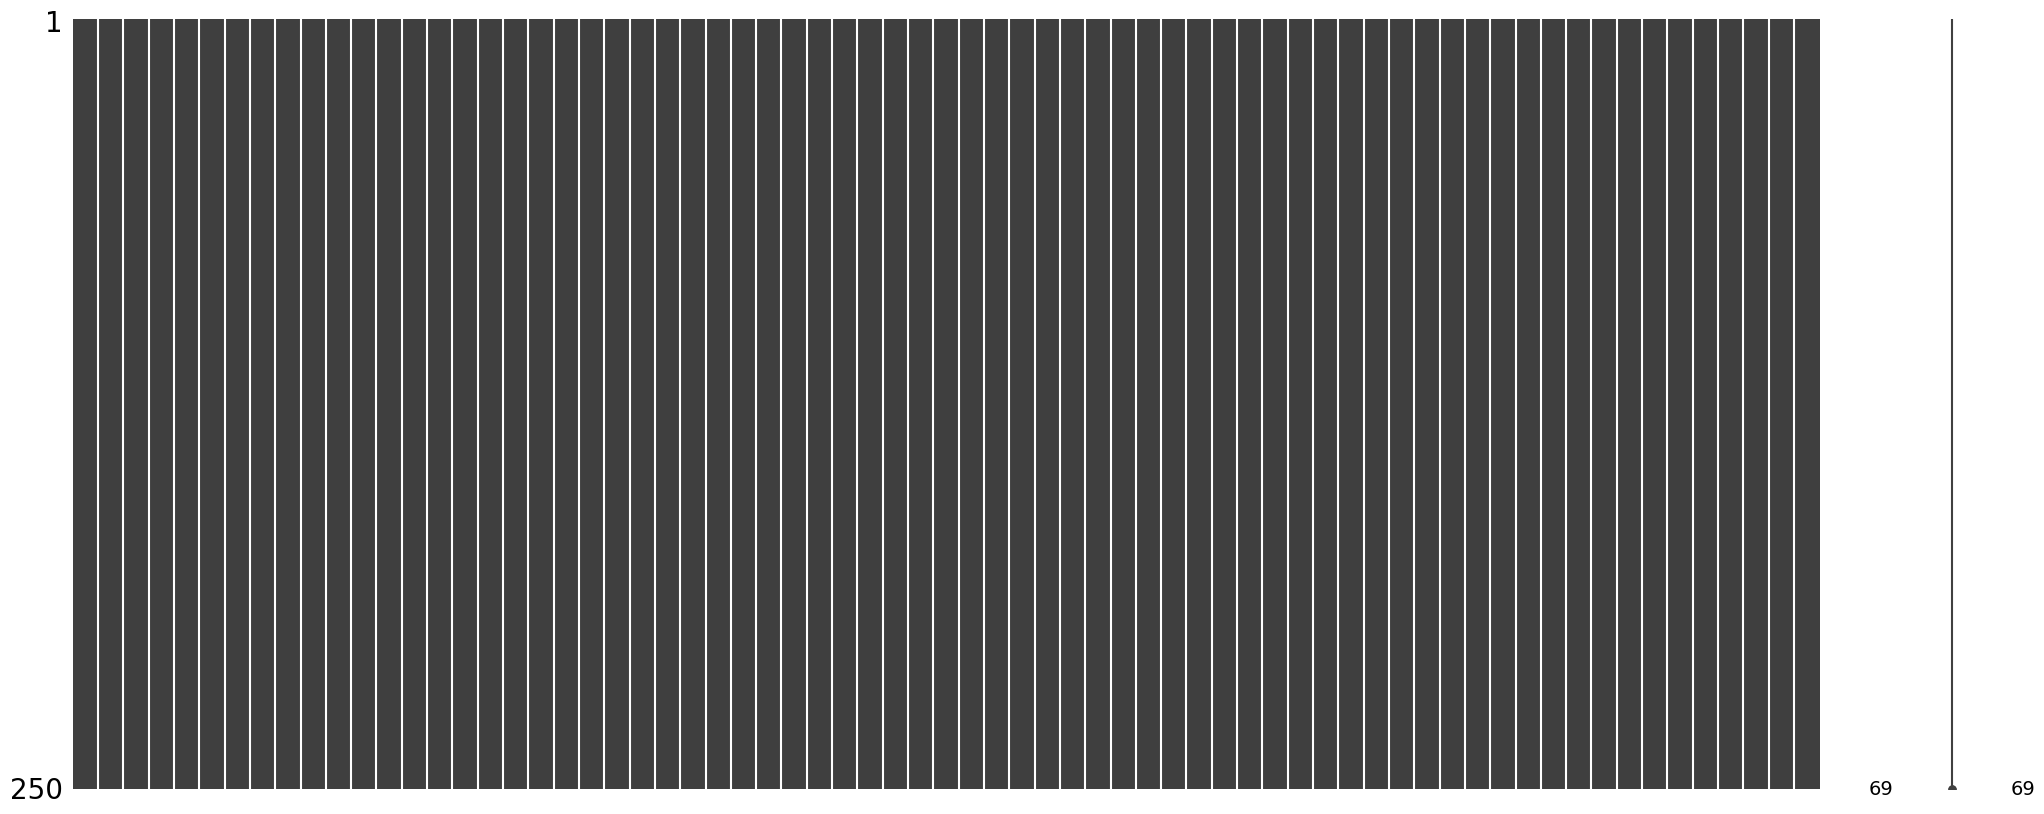

In [13]:
msno.matrix(extract_data.sample(250))

In [14]:

Total_Rows = combined_data.shape[0]  #Get the rows number 
print(Total_Rows)  #Print out total rows number 

15979


In [15]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15979 entries, 0 to 15978
Data columns (total 69 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Campaign_Id                                                                    15979 non-null  int64 
 1   Campaign_Title_x                                                               15979 non-null  object
 2   Receiving_NPO_Name*                                                            15979 non-null  object
 3   Receiving_NPO_Id*                                                              15979 non-null  int64 
 4   NPO_Status                                                                     15979 non-null  object
 5   Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month  15979 non-null  int64 
 6   Public_Campaign_Access        

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [16]:
extract_data['Distinct_Donors'] = pd.to_numeric( extract_data['Distinct_Donors']) 
extract_data['Actual_Donation_Amount'] = pd.to_numeric( extract_data['Actual_Donation_Amount']) 

In [17]:
extract_data['Creator_Type'].unique()

array(['NPO', 'INDIVIDUAL', 'COMMUNITY', 'CORPORATE', 'SCHOOL', 'OTHER',
       'GOVERNMENT', 'Corporate'], dtype=object)

In [18]:
num_deductibility = 0
extract_data['Donation_per_donor'] = 0
Creator_type = ['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY', 'CORPORATE', 'GOVERNMENT', 'SCHOOL']
# Sector = ['Social and Welfare', 'Others', 'Health', 'Arts and Heritage', 'Sports', 'Education', 'Religious', 'Community']
Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
for j in range(len(extract_data["Actual_Donation_Amount"])):
    if extract_data["Distinct_Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Actual_Donation_Amount'].iloc[j]/extract_data['Distinct_Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['NPO_Ipc_Status_For_Tax_Deductibility'].iloc[j] == True:
        extract_data.loc[j, 'NPO_Ipc_Status_For_Tax_Deductibility'] = 1
        num_deductibility += 1
    else:
        extract_data.loc[j, 'NPO_Ipc_Status_For_Tax_Deductibility'] = 0
    if extract_data['Creator_Type'].iloc[j] == Creator_type[0]:
        extract_data['Creator_Type'].iloc[j] = 0
    if extract_data['Creator_Type'].iloc[j] == Creator_type[1]:
        extract_data['Creator_Type'].iloc[j] = 1
    if extract_data['Creator_Type'].iloc[j] == Creator_type[2]:
        extract_data['Creator_Type'].iloc[j] = 2
    if extract_data['Creator_Type'].iloc[j] == Creator_type[3]:
        extract_data['Creator_Type'].iloc[j] = 3
    if extract_data['Creator_Type'].iloc[j] == Creator_type[4]:
        extract_data['Creator_Type'].iloc[j] = 4
    if extract_data['Creator_Type'].iloc[j] == Creator_type[5]:
        extract_data['Creator_Type'].iloc[j] = 5
    if extract_data['Creator_Type'].iloc[j] == Creator_type[6]:
        extract_data['Creator_Type'].iloc[j] = 6
    if extract_data['Creator_Type'].iloc[j] == Creator_type[7]:
        extract_data['Creator_Type'].iloc[j] = 7
'''
    if extract_data['Sector'].iloc[j] == Sector[0]:
        extract_data['Sector'].iloc[j] = 0
    if extract_data['Sector'].iloc[j] == Sector[1]:
        extract_data['Sector'].iloc[j] = 1
    if extract_data['Sector'].iloc[j] == Sector[2]:
        extract_data['Sector'].iloc[j] = 2
    if extract_data['Sector'].iloc[j] == Sector[3]:
        extract_data['Sector'].iloc[j] = 3
    if extract_data['Sector'].iloc[j] == Sector[4]:
        extract_data['Sector'].iloc[j] = 4
    if extract_data['Sector'].iloc[j] == Sector[5]:
        extract_data['Sector'].iloc[j] = 5
    if extract_data['Sector'].iloc[j] == Sector[6]:
        extract_data['Sector'].iloc[j] = 6
    if extract_data['Sector'].iloc[j] == Sector[7]:
        extract_data['Sector'].iloc[j] = 7
'''
    
print("Number of deductibility:", num_deductibility)

Number of deductibility: 14998


# <font size =6 face = 'time new roman'> Calculate the numbers of "org_causes" and "camp_causes" </font>

In [19]:
Org_causes = ['Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
       'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
       'Org_Cause_Humanitarian', 'Org_Cause_Social_Service',
       'Org_Cause_Sports', 'Org_Cause_Women_&_Girls',
       ]
Cam_causes = ['Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_&_Heritage',
       'Cam_Cause_Children_&_Youth', 'Cam_Cause_Community',
       'Cam_Cause_Disability', 'Cam_Cause_Education', 'Cam_Cause_Elderly',
       'Cam_Cause_Environment', 'Cam_Cause_Families', 'Cam_Cause_Health',
       'Cam_Cause_Humanitarian', 'Cam_Cause_Social_Service',
       'Cam_Cause_Sports', 'Cam_Cause_Women_&_Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [20]:
Image_Number = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Campaign_Image_Number"] =  Image_Number(extract_data["Campaign_Image1_Id"],extract_data["Campaign_Image2_Id"],extract_data["Campaign_Image3_Id"],extract_data["Campaign_Image4_Id"],extract_data["Campaign_Image5_Id"])

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [21]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)

extract_data["Campaign_Video"] = Video_or_not(extract_data["Campaign_Video"])
extract_data["Campaign_Video"].unique()

array([1, 0])

<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [22]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_Duration'] = '0'
i = 0

# Get the detail infomation of data
for row in extract_data['Campaign_Start_Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] = month_dictionary[ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data.loc[i, 'Campaign_Start_Year'] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_Duration'] = (datetime.strptime(extract_data.loc[i, 'Campaign_End'], '%Y-%m-%d') - datetime.strptime(extract_data.loc[i,'Campaign_Start'], '%Y-%m-%d')).days
#    if extract_data.loc[i, 'Campaign_Duration'] < 0:
#        extract_data.loc[i, 'Campaign_Duration'] = 0
    i += 1

In [23]:

Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
extract_data['Campaign_Start_Year_category'] = 0
for j in range(len(extract_data["Actual_Donation_Amount"])):
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[0]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 0
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[1]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 1
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[2]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 2
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[3]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 3
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[4]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 4
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[5]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 5


# Clean data

# <font size =6 face = 'time new roman' >Here delete the rows where Campaign_Duration less than 1</font>

In [24]:

num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign_Duration'] <= 1:
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where duraiton less than 0:", num)  
Total_Rows = extract_data.shape[0]


Total delete numbers where duraiton less than 0: 180


In [25]:
Impact_msg_list = ['Impact_Message_1','Impact_Message_2','Impact_Message_3','Impact_Message_4','Impact_Message_5']
Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

#for j in range(len(Impact_msg_list)):
#    cnt=0
#    for s in extract_data[Impact_msg_list[j]]:
#        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
#        cnt += 1
cnt=0

In [26]:
# Nunber of description words
extract_data['Number_of_words_describing_campaign'] = 0
extract_data['Num_desc_NPO'] = 0
for index, row in extract_data.iterrows():
    
    extract_data.loc[index, 'Number_of_words_describing_campaign'] = sentence_length( str(extract_data.loc[index, 'Description_of_Campaign']))
    extract_data.loc[index, 'Num_desc_NPO'] = sentence_length( str(extract_data.loc[index, 'Description_of_NPO']))


# Delete the lines where NPO is blank

In [27]:
'''
num1 = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Num_desc_NPO'] <= 1 and   extract_data.loc[index, 'Actual_Donation_Amount']<=0 :
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete numbers where Num_desc_NPO less than 1:", num1)  
Total_Rows = extract_data.shape[0]
'''

'\nnum1 = 0\nfor index, row in extract_data.iterrows():\n    if extract_data.loc[index, \'Num_desc_NPO\'] <= 1 and   extract_data.loc[index, \'Actual_Donation_Amount\']<=0 :\n        extract_data.drop(index, inplace=True)\n        num1 += 1\nprint("Total delete numbers where Num_desc_NPO less than 1:", num1)  \nTotal_Rows = extract_data.shape[0]\n'

# Re-consider description contents again

In [28]:
num2 = 0
num3 = 0
for index, row in extract_data.iterrows():
    if "test" in str(extract_data.loc[index, 'Description_of_Campaign']) or "Test" in str(extract_data.loc[index, 'Description_of_Campaign']) and extract_data.loc[index, 'Number_of_words_describing_campaign']< 10:
        #extract_data.drop(index, inplace=True)
        num2 += 1
    if extract_data.loc[index, 'Number_of_words_describing_campaign']< 5:
        num2 += 1
print("Total delete numbers:", num2)  


Total delete numbers: 630


In [29]:
# extract_data['Cam_Org_causes'] = extract_data['Org_causes']-extract_data['Cam_causes']

# Average donation per donator

In [30]:
# extract_data['Avg_donation_amount'] =  extract_data['Actual_Donation_Amount']/extract_data['Distinct_Donors']

# <font size =6 face = 'time new roman' >Here delete the rows where Actual_Donation_Amount is 0 but Distinct_Donors bigger than 0</font>

In [31]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount'] <= 0 and extract_data.loc[index,'Distinct_Donors'] > 0 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0: 100


In [32]:
extract_data['Avg_custom_amount'] = (extract_data['Custom_Amount_1']+extract_data['Custom_Amount_2'] +extract_data['Custom_Amount_3'] + extract_data['Custom_Amount_4'] )/4


# <font size =6 face = 'time new roman' >Polarity</font>

In [33]:
'''
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0
'''

extract_data['Description_Campaign_polarity'] = 0
#extract_data['Description_Campaign_subjectivity'] = 0

from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
#Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5','Description of Campaign']
Impact_msg_list = ['Description_of_Campaign']
#Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity','Description_Campaign_polarity']
Msg_polarity_list = ['Description_Campaign_polarity']
#Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity','Description_Campaign_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(str(i))
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        #extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
#extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
#extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]


,Impact_Message_5,Custom_Amount_1,Custom_Amount_2,Custom_Amount_3,Custom_Amount_4,Description_of_Campaign,Description_of_NPO,Campaign_Title_y,Org_Cause_Animal_Welfare,Org_Cause_Arts_&_Heritage,...,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,Campaign_Duration,Campaign_Start_Year_category,Number_of_words_describing_campaign,Num_desc_NPO,Avg_custom_amount,Description_Campaign_polarity
0,Thank you for donating!,10,50,100,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",World Suicide Prevention Day 2017,0,0,...,9,2017,2017-1-1,2017-9-10,252,0,161,163,90.0,0.405556
1,Thank you for donating.,10,50,100,200,"Over the years at SPD, we saw how assistive te...",SPD is a local charity set up in 1964 to help ...,Enabling Lives,0,0,...,3,2017,2017-1-1,2017-3-31,89,0,209,164,90.0,0.328247
2,Thank you for donating.,10,50,100,200,"In 2007, SPD started its Charity Hongbao fundr...",SPD is a local charity set up in 1964 to help ...,SPD Charity Hongbao 2017,0,0,...,2,2017,2017-1-1,2017-2-28,58,0,155,164,90.0,0.421733
3,0,0,0,0,0,Hi Everybody! \r\n\r\nWe are a group of 4 pers...,Habitat for Humanity Singapore is part of an i...,Sundown Run 2017 - Running 4 HFH,0,0,...,3,2017,2017-1-2,2017-3-31,88,0,160,92,0.0,0.307500
4,0,0,0,0,0,My name is Dhanyatha and I am turning 2 this m...,Children's Cancer Foundation (CCF) is a social...,Child For Child,0,0,...,2,2017,2017-1-1,2017-2-20,50,0,65,164,0.0,-0.125000
5,WOM will help to raise fund for Project Pari. ...,10,50,100,200,Women On Mountains (WOM) originated from Ace A...,0,ACE Adventure Women On Mountains (WOM) for Pro...,0,0,...,1,2018,2017-1-1,2018-1-1,365,0,62,1,90.0,0.166667
6,0,0,0,0,0,Hello everyone! Happy New Year!\r\n\r\nWith t...,The VIVA Foundation for Children with Cancer i...,Darius' Birthday Wish,0,0,...,2,2017,2017-1-3,2017-2-7,35,0,159,128,0.0,0.266544
7,Thank you for donating.,10,50,100,200,Stray rescue in Singapore is a determined and ...,Oasis Second Chance Animal Shelter Ltd (OSCAS)...,Care and feeding for over 100 shelter dogs,Animal Welfare,0,...,12,2017,2017-1-3,2017-12-31,362,0,85,58,90.0,0.162245
8,0,0,0,0,0,Do you want to have a different 2017?\r\nSuppo...,Community Chest is the philanthropy and engage...,Red Packet Love,0,0,...,2,2017,2017-1-3,2017-2-14,42,0,32,157,0.0,0.197917
9,Thank you for your donation in support of the ...,10,50,100,200,GIVE THE GIFT OF HOPE\r\n\r\nPersons with auti...,"Out of passion to care for the physical, emoti...",Support St. Andrew's Autism Centre,0,0,...,1,2018,2017-1-3,2018-1-3,365,0,57,163,90.0,0.250000


# Future tense

In [34]:
# It is accomplished mainly by using word_tokenize package.
# import the releated package
from nltk import word_tokenize, pos_tag
# This package is used for spliting the sentence
# Here is how it works
sentence = "Your donation will testament that suicide prevention is everyone's business."
tokens = word_tokenize(sentence)
print(tokens)
# ['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
# Tag different compoments in the sentence
print(pos_tag(tokens))
'''
Here is the result after taging
[('Your', 'PRP$'),
 ('donation', 'NN'),
 ('will', 'MD'),
 ('testament', 'VB'),
 ('that', 'IN'),
 ('suicide', 'JJ'),
 ('prevention', 'NN'),
 ('is', 'VBZ'),
 ('everyone', 'NN'),
 ("'s", 'POS'),
 ('business', 'NN'),
 ('.', '.')]
'''
# MD modal could, will
# So we can use the number of MD tags to judge the future tense.
# Another example   can.may.might.could.should.would.will.must.
sentence2 = 'Your donation will testament that suicide prevention is everyone business.Your $500 donation (5 tins) can contribute towards \
providing a month of meals for a child in HomeSweetHome@Admiralty (HSH).'
text = word_tokenize(sentence2)
tagged = pos_tag(text)

print( ([word for word in tagged if word[1] == "MD"]))
# The result is 2


['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
[('Your', 'PRP$'), ('donation', 'NN'), ('will', 'MD'), ('testament', 'VB'), ('that', 'IN'), ('suicide', 'JJ'), ('prevention', 'NN'), ('is', 'VBZ'), ('everyone', 'NN'), ("'s", 'POS'), ('business', 'NN'), ('.', '.')]
[('will', 'MD'), ('can', 'MD')]


In [35]:
len([word for word in tagged if word[1] == "VB"])

2

In [36]:
MD_list = []
test = [word for word in tagged if word[1] == "MD"]
for ite in test:
    if ite[0] not in MD_list:
        MD_list.append(ite[0])
print(MD_list)

['will', 'can']


In [37]:
from nltk import word_tokenize, pos_tag
MD_list = []
def determine_tense_input(sentence):
    text = word_tokenize(sentence)
    tagged = pos_tag(text)

    tense = {}
    
    tense["future"] = len([word for word in tagged if word[1] == "MD"])
    test = [word for word in tagged if word[1] == "MD"]
    for ite in test:
        if ite[0] not in MD_list:
            MD_list.append(ite[0])

    return(tense)

In [38]:
# Nunber of description words
extract_data['Future_tense'] = 0
extract_data['Future_tense_percentage'] = 0
#extract_data['Num_desc_NPO'] = 0

for index, row in extract_data.iterrows():
    Impact_msg_str = ''
    Impact_msg_str += extract_data.loc[index,'Impact_Message_1']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_2']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_3']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_4']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_5']
    extract_data.loc[index,'Future_tense'] = determine_tense_input(Impact_msg_str)['future']
    extract_data.loc[index,'Future_tense_percentage'] = determine_tense_input(Impact_msg_str)['future']/sentence_length(Impact_msg_str)

In [39]:
extract_data['Future_tense_percentage'].max()

0.12903225806451613

In [40]:
extract_data['Future_tense_percentage'].min()

0.0

# Convert to numeric

In [41]:
numeric_features1 = ['Actual_Donation_Amount', 'Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',  'Cam_causes', 'Description_Campaign_polarity',"Creator_Type","Campaign_Start_Year", 'Campaign Promise']

extract_data['Actual_Donation_Amount'] = pd.to_numeric( extract_data['Actual_Donation_Amount'])
extract_data['Campaign_Goal'] = pd.to_numeric( extract_data['Campaign_Goal'])
extract_data['NPO_Ipc_Status_For_Tax_Deductibility'] = pd.to_numeric( extract_data['NPO_Ipc_Status_For_Tax_Deductibility'])
extract_data['Campaign_Duration'] = pd.to_numeric( extract_data['Campaign_Duration'])
extract_data['Campaign_Video'] = pd.to_numeric( extract_data['Campaign_Video'])
extract_data['Campaign_Image_Number'] = pd.to_numeric( extract_data['Campaign_Image_Number'])
extract_data['Number_of_words_describing_campaign'] = pd.to_numeric( extract_data['Number_of_words_describing_campaign'])

extract_data['Cam_causes'] = pd.to_numeric( extract_data['Cam_causes'])
extract_data['Creator_Type'] = pd.to_numeric(extract_data['Creator_Type'])
#extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['NPO_Ipc_Status_For_Tax_Deductibility'] = pd.to_numeric(extract_data['NPO_Ipc_Status_For_Tax_Deductibility'])
extract_data['Campaign_Video'] = pd.to_numeric(extract_data['Campaign_Video'])
extract_data['Campaign_Start_Year_category'] = pd.to_numeric(extract_data['Campaign_Start_Year_category'])
#extract_data['Campaign Promise'] = pd.to_numeric(extract_data['Campaign Promise'])

extract_data["Distinct_Donors"] = pd.to_numeric(extract_data["Distinct_Donors"])
#extract_data['Sector'] = pd.to_numeric( extract_data['Sector'])
extract_data['Campaign_Video'].unique()

array([1, 0])

# Log Transformation

In [42]:
extract_data = extract_data.rename(columns={'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month':'Campaign_frequency'})

In [43]:
extract_data['Campaign_frequency'] =  pd.to_numeric(extract_data['Campaign_frequency'])

extract_data['Campaign_Start_Year'] =  pd.to_numeric(extract_data['Campaign_Start_Year'])

In [44]:
extract_data['Log_Actual_Donation_Amount']=0
extract_data['Log_Distinct_Donors'] = 0
extract_data['Log_Campaign_Goal'] = 0
extract_data['Log_Campaign_Duration'] = 0
extract_data['Log_avg_custom_amount'] = 0
extract_data.loc[index,'Future_tense_X_Campaign_frequency'] = 0
extract_data.loc[index,'Campaign_frequency_X_Log_avg_custom_amount'] = 0
extract_data['Campaign_success'] = 0
extract_data['Log_campaign_success'] = 0
eps = 0.000001
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount'] > 0:
        extract_data.loc[index,'Log_Actual_Donation_Amount'] = np.log(extract_data.loc[index,'Actual_Donation_Amount'])
    else:
        extract_data.loc[index,'Log_Actual_Donation_Amount'] = np.log(eps)
    if extract_data.loc[index,'Distinct_Donors'] > 0:
        extract_data.loc[index,'Log_Distinct_Donors'] = np.log(extract_data.loc[index,'Distinct_Donors'])
    else:
        extract_data.loc[index,'Log_Distinct_Donors'] = np.log(eps)
    if extract_data.loc[index,'Campaign_Goal'] > 0:
        extract_data.loc[index,'Log_Campaign_Goal'] = np.log(extract_data.loc[index,'Campaign_Goal'])
    else:
        extract_data.loc[index,'Log_Campaign_Goal'] = np.log(eps)
    if extract_data.loc[index,'Campaign_Duration'] > 0:
        extract_data.loc[index,'Log_Campaign_Duration'] = np.log(extract_data.loc[index,'Campaign_Duration'])
    else:
        extract_data.loc[index,'Log_Campaign_Duration'] = np.log(eps)
    if extract_data.loc[index,'Avg_custom_amount'] > 0:
        extract_data.loc[index,'Log_avg_custom_amount'] = np.log(extract_data.loc[index,'Avg_custom_amount'])
    else:
        extract_data.loc[index,'Log_avg_custom_amount'] = np.log(eps)
    if extract_data.loc[index,'Campaign_Goal'] > 0 and extract_data.loc[index,'Distinct_Donors'] > 0: 
        extract_data.loc[index,'Log_campaign_success'] = np.log( extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal'])
        extract_data.loc[index,'Campaign_success'] = extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal']
    else:
        extract_data.loc[index,'Log_campaign_success'] = np.log(eps)

    if extract_data.loc[index,'Org_causes'] > 0:
        extract_data.loc[index,'Log_Org_causes'] = np.log(extract_data.loc[index,'Org_causes'])
    else:
        extract_data.loc[index,'Log_Org_causes'] = np.log(eps)


    extract_data.loc[index,'Future_tense_X_Campaign_frequency'] = extract_data.loc[index, 'Future_tense'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Future_tense_percentage_X_Campaign_frequency'] = extract_data.loc[index, 'Future_tense_percentage'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Campaign_frequency_X_Log_avg_custom_amount'] = extract_data.loc[index, 'Campaign_frequency'] * extract_data.loc[index,'Log_avg_custom_amount']


In [45]:
#extract_data.to_csv("20_5_2023.csv")

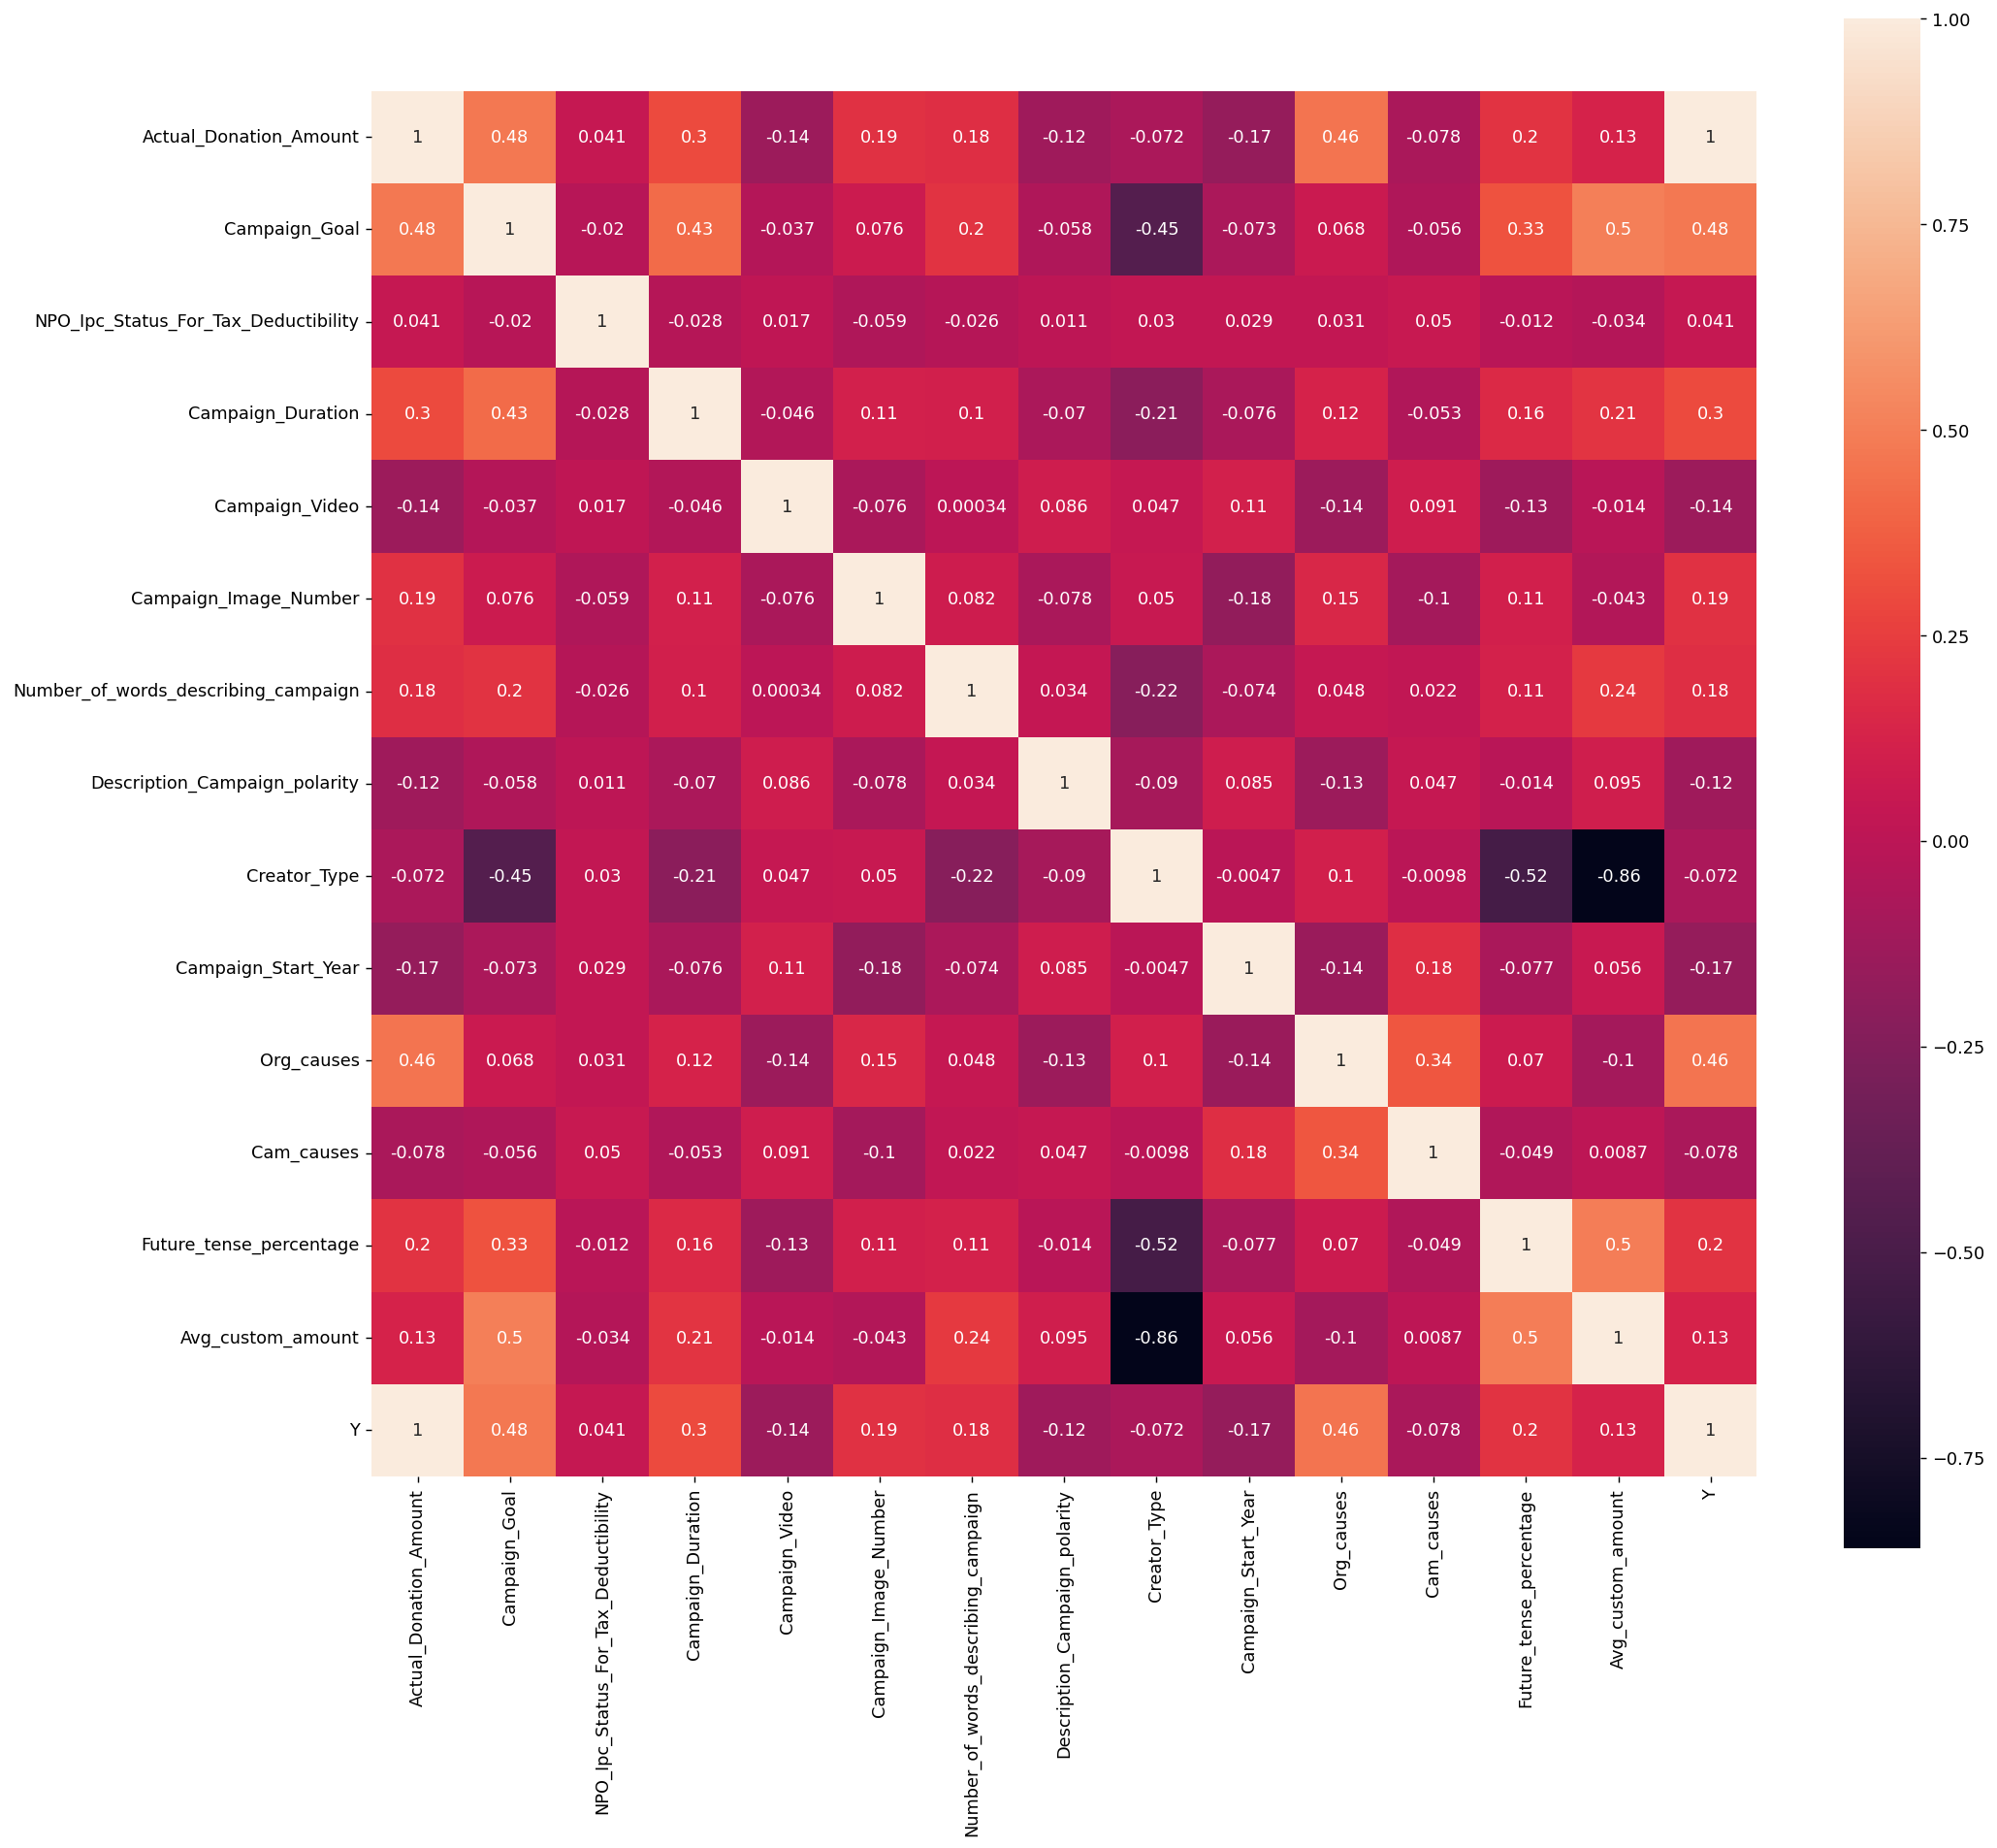

In [46]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Actual_Donation_Amount', 'Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Avg_custom_amount']

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Actual_Donation_Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

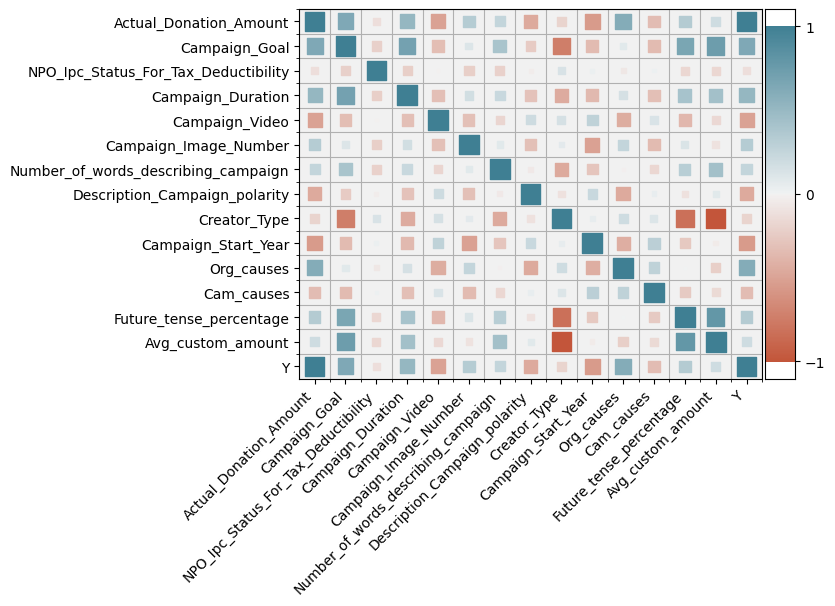

In [47]:
# pip install heatmapz

from heatmap import heatmap, corrplot

corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

Do a scatter plot, using IV with a DV 

Scatter plot 1
Actual_Donation_Amount + Campaign Promise

Scatter plot 2
Actual_Donation_Amount + Campaign Promise

Scatter plot 3
Number of Distinct_Donors   + Campaign Promise

Scatter plot 4 
Number of Distinct_Donors  + Campaign Promise

In [48]:
'''
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(222)
plt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(223)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(224)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.show()
'''

'\nplt.figure(figsize=(15,15))\n\nplt.subplot(221)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(222)\nplt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(223)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(224)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.show()\n'

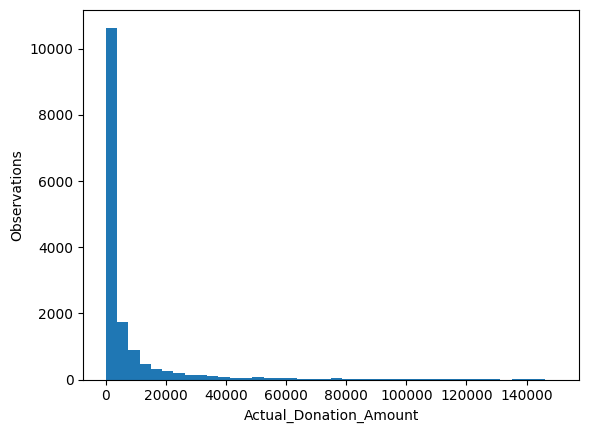

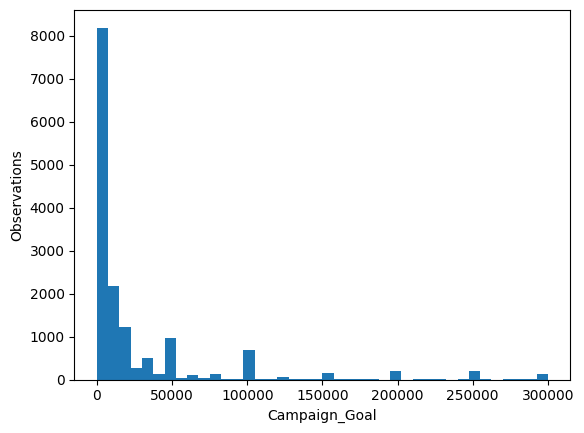

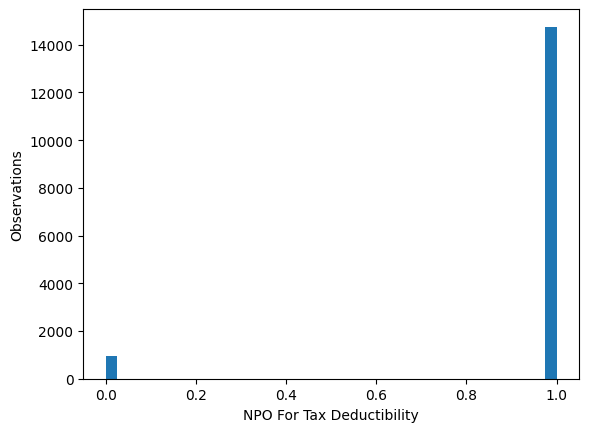

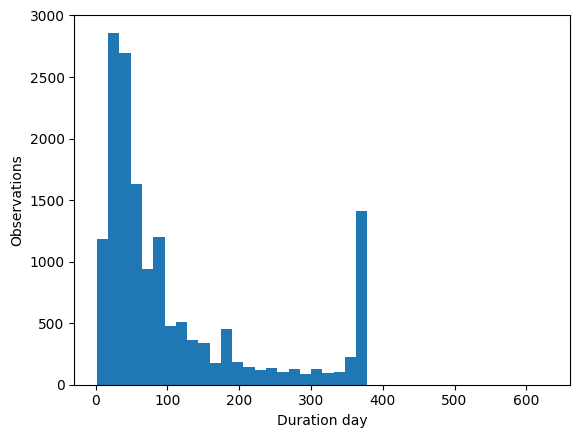

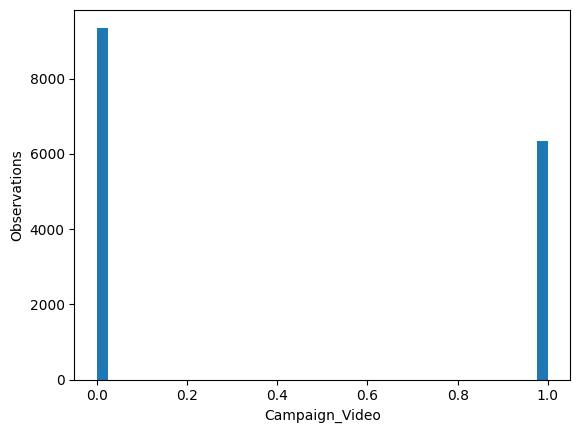

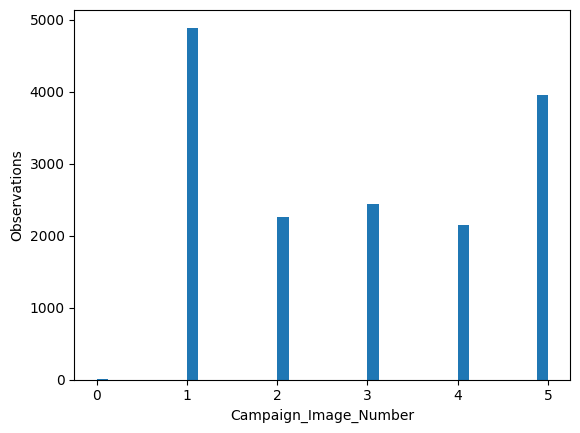

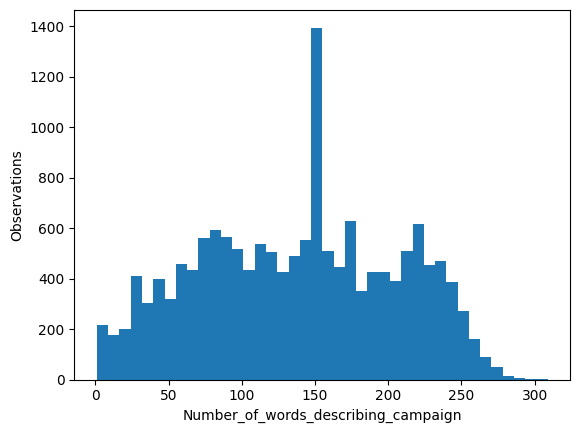

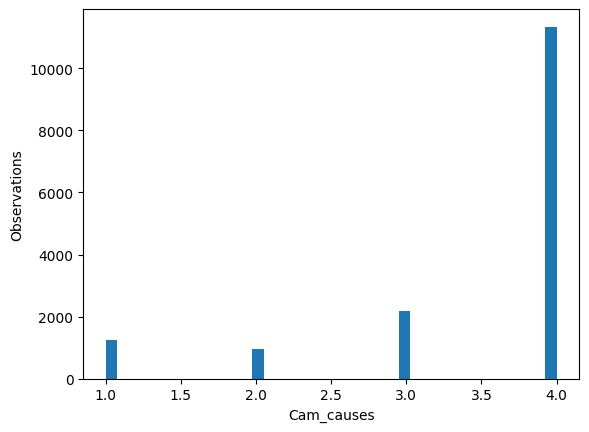

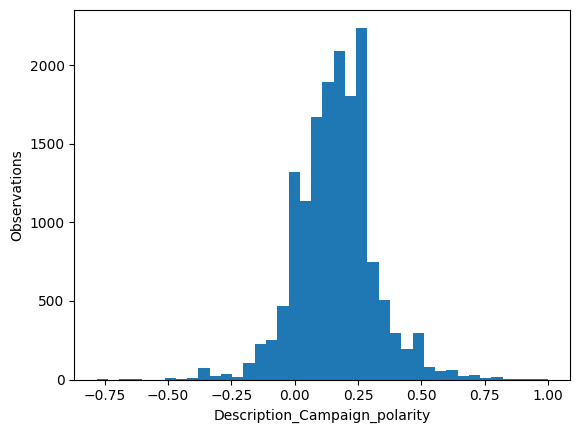

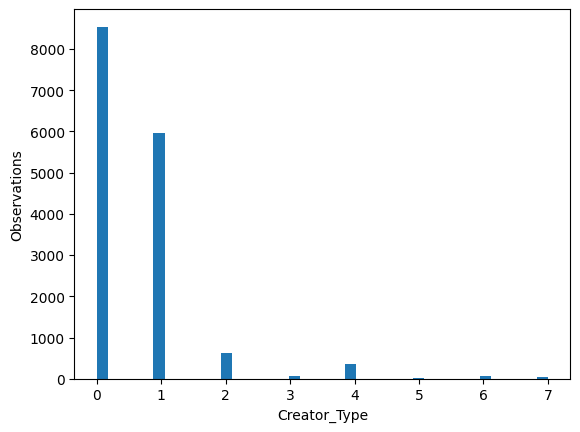

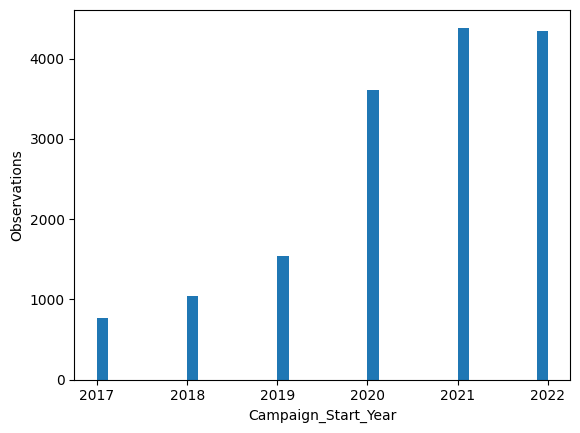

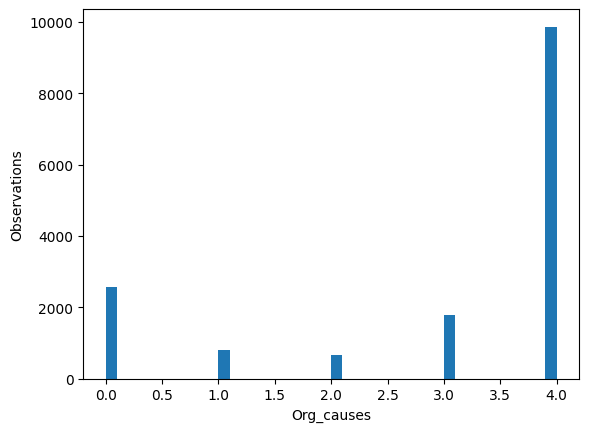

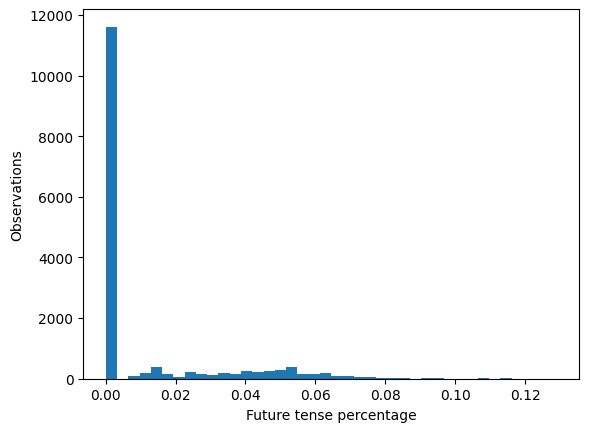

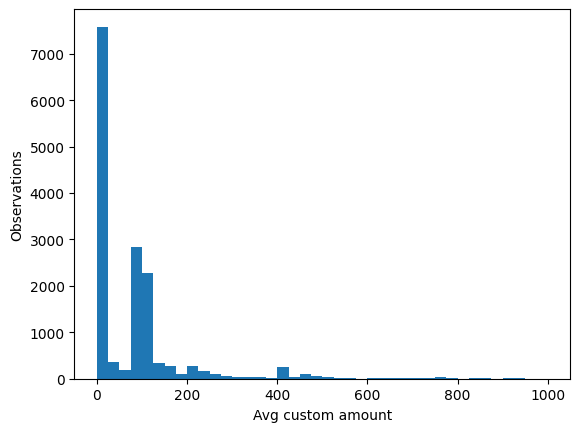

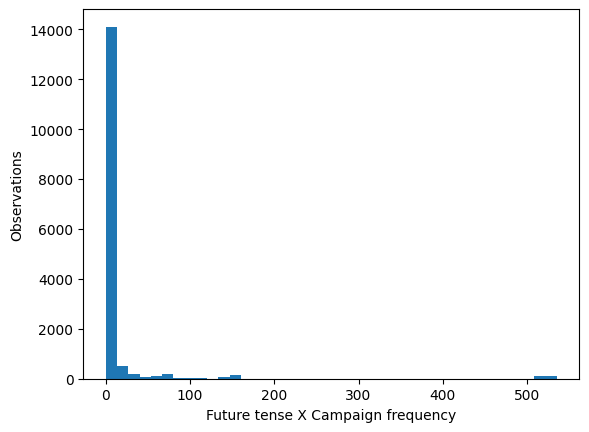

In [49]:
#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Actual_Donation_Amount'], bins=40, range=(0,150000))
plt.xlabel('Actual_Donation_Amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Campaign_Goal'], bins=40, range=(0,300000))
plt.xlabel('Campaign_Goal'); plt.ylabel('Observations')
plt.show()

#plt.subplot(443)
plt.hist(extract_data['NPO_Ipc_Status_For_Tax_Deductibility'], bins=40)
plt.xlabel('NPO For Tax Deductibility'); plt.ylabel('Observations')
plt.show()
#plt.subplot(444)
plt.hist(extract_data['Campaign_Duration'], bins=40)
plt.xlabel('Duration day'); plt.ylabel('Observations')
plt.show()
#plt.subplot(445)
plt.hist(extract_data['Campaign_Video'], bins=40)
plt.xlabel('Campaign_Video'); plt.ylabel('Observations')
plt.show()

#plt.subplot(446)
plt.hist(extract_data['Campaign_Image_Number'], bins=40)
plt.xlabel('Campaign_Image_Number'); plt.ylabel('Observations')
plt.show()

#plt.subplot(447)
plt.hist(extract_data['Number_of_words_describing_campaign'], bins=40)
plt.xlabel('Number_of_words_describing_campaign'); plt.ylabel('Observations')
plt.show()

#plt.subplot(448)
plt.hist(extract_data['Cam_causes'], bins=40)
plt.xlabel('Cam_causes'); plt.ylabel('Observations')
plt.show()

#plt.subplot(449)
plt.hist(extract_data['Description_Campaign_polarity'], bins=40)
plt.xlabel('Description_Campaign_polarity'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,10)
plt.hist(extract_data['Creator_Type'], bins=40)
plt.xlabel('Creator_Type'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,11)
plt.hist(extract_data['Campaign_Start_Year'], bins=40)
plt.xlabel('Campaign_Start_Year'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,12)
plt.hist(extract_data['Org_causes'], bins=40)
plt.xlabel('Org_causes'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,13)
plt.hist(extract_data['Future_tense_percentage'], bins=40)
plt.xlabel('Future tense percentage'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,14)
plt.hist(extract_data['Avg_custom_amount'], bins=40, range=(0,1000))
plt.xlabel('Avg custom amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,15)
plt.hist(extract_data['Future_tense_X_Campaign_frequency'], bins=40)
plt.xlabel('Future tense X Campaign frequency'); plt.ylabel('Observations')
plt.show()


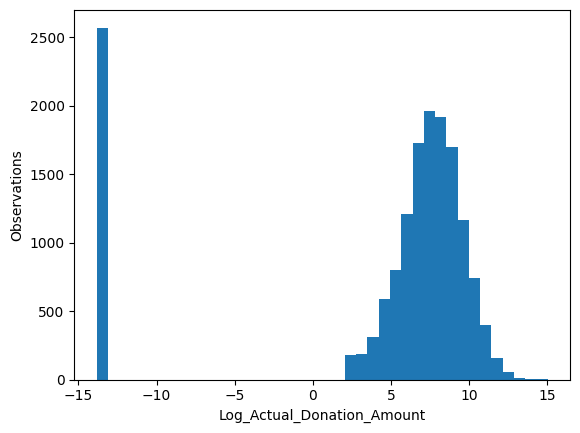

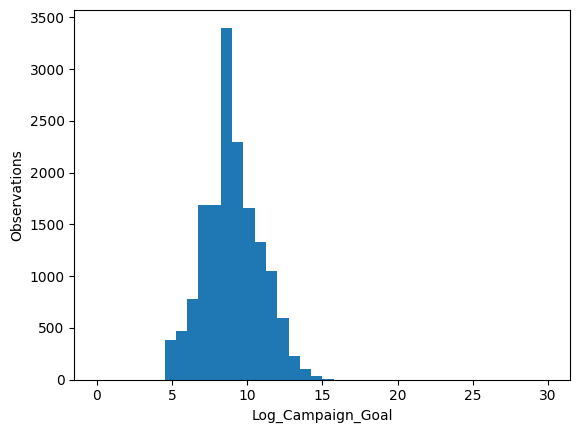

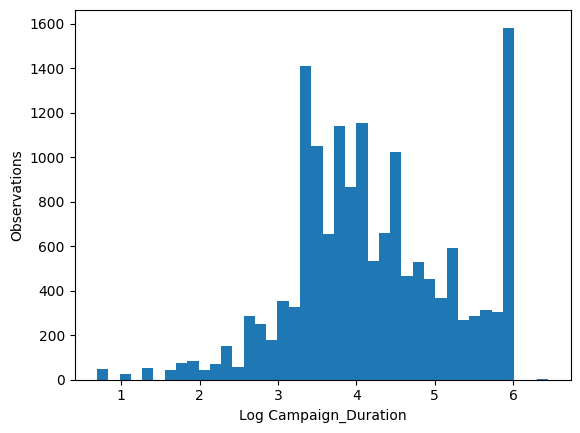

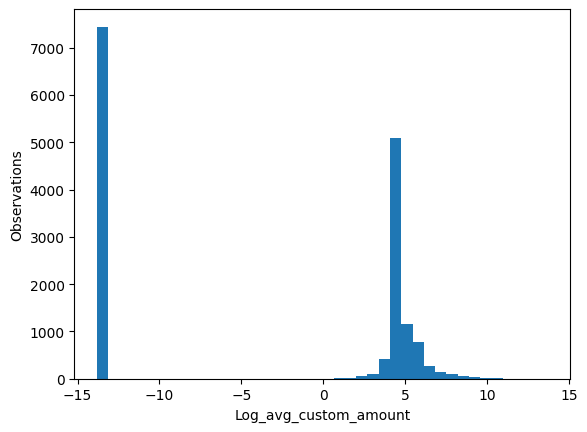

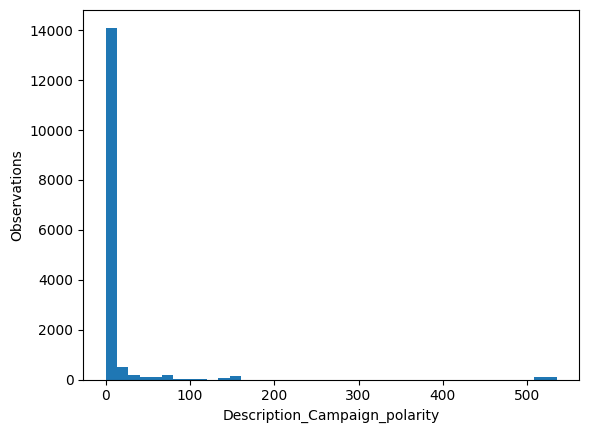

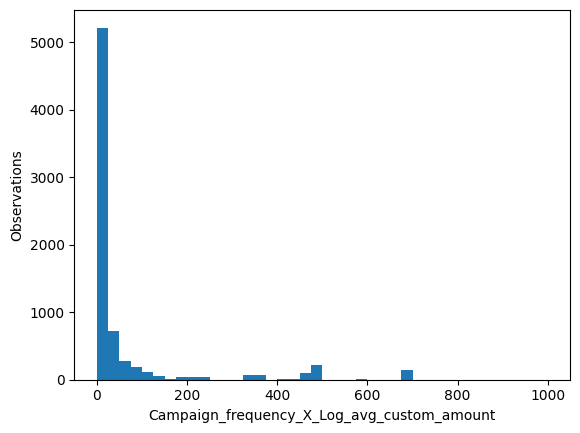

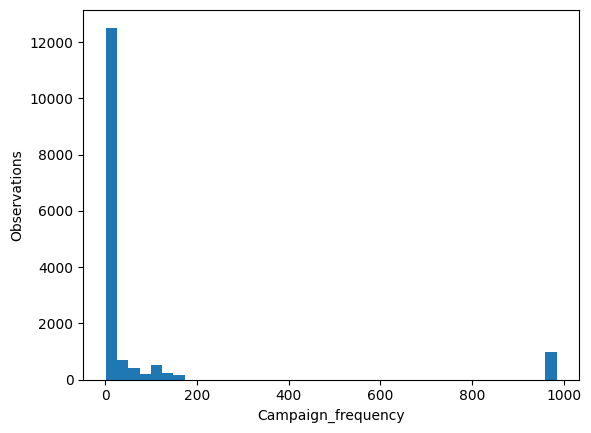

In [50]:

numeric_features1

#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Log_Actual_Donation_Amount'], bins=40)
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Log_Campaign_Goal'], bins=40, range=(0,30))
plt.xlabel('Log_Campaign_Goal'); plt.ylabel('Observations')
plt.show()


#plt.subplot(444)
plt.hist(extract_data['Log_Campaign_Duration'], bins=40)
plt.xlabel('Log Campaign_Duration'); plt.ylabel('Observations')
plt.show()

#plt.subplot(445)
plt.hist(extract_data['Log_avg_custom_amount'], bins=40)
plt.xlabel('Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()


#plt.subplot(449)
plt.hist(extract_data['Future_tense_X_Campaign_frequency'], bins=40)
plt.xlabel('Description_Campaign_polarity'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,14)
plt.hist(extract_data['Campaign_frequency_X_Log_avg_custom_amount'], bins=40, range=(0,1000))
plt.xlabel('Campaign_frequency_X_Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()


plt.hist(extract_data['Campaign_frequency'], bins=40)
plt.xlabel('Campaign_frequency'); plt.ylabel('Observations')
plt.show()




<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [51]:
numeric_features2 = ['Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense', 'Avg_custom_amount'
                     ]

In [52]:
def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features2]
for i in numeric_features2:
	print(i, "\t", vif(df=test_data, col_i=i))


Campaign_Goal 	 1.074208525023968
NPO_Ipc_Status_For_Tax_Deductibility 	 1.0135782867855325
Campaign_Duration 	 1.0944560661147735
Campaign_Video 	 1.0616484283746896
Campaign_Image_Number 	 1.0932186081834006
Number_of_words_describing_campaign 	 1.0345705611722469
Description_Campaign_polarity 	 1.0241247058131886
Creator_Type 	 1.1872538399750625
Campaign_Start_Year 	 1.13160906658436
Org_causes 	 1.232413811109646
Cam_causes 	 1.1995125335277836
Future_tense 	 1.1781728637442956
Avg_custom_amount 	 1.016775682217701


In [53]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Actual_Donation_Amount ~ Campaign_Goal + NPO_Ipc_Status_For_Tax_Deductibility + Campaign_Duration+\
                     Campaign_Video + Campaign_Image_Number + Number_of_words_describing_campaign + Description_Campaign_polarity\
                     + Creator_Type + Campaign_Start_Year + Org_causes', data=extract_data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif



,VIF,variable
0,2.173969e+06,Intercept
1,1.053693e+00,Campaign_Goal
2,1.011229e+00,NPO_Ipc_Status_For_Tax_Deductibility
3,1.083661e+00,Campaign_Duration
4,1.042941e+00,Campaign_Video
5,1.075709e+00,Campaign_Image_Number
6,1.034212e+00,Number_of_words_describing_campaign
7,1.021759e+00,Description_Campaign_polarity
8,1.061611e+00,Creator_Type
9,1.053808e+00,Campaign_Start_Year


In [55]:
test_data = extract_data[numeric_features1[1:]]
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

#x = test_data
x = add_constant(test_data)

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(vif)


[2329873.411556508, 1.0759566472411985, 1.013679213022417, 1.0937133912859953, 1.0631054020395836, 1.0877957007364183, 1.0344006919650544, 1.023599694172131, 1.1908235668981604, 1.1307615824241095, 1.2347188838404943, 1.1988131782227718, 1.1798167055180615, 1.016853782300319]


In [56]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(tol)


[4.2920786813560596e-07, 0.9294054761072811, 0.986505382721985, 0.9143163172064608, 0.9406405028903861, 0.9192902668424023, 0.9667433594812246, 0.976944410684669, 0.8397549626976104, 0.8843597231665894, 0.809900952425365, 0.8341583310607994, 0.8475892868129008, 0.9834255597081102]


In [57]:
'''
Clean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr

     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)

     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')

'''

"\nClean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr\n\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)\n\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n\n"

<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [59]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [60]:
for title in numeric_features1:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    #print( title, "Variance:" ,np.var(extract_data[title]))
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))
    

Actual_Donation_Amount Median: 9984.546404229568
Actual_Donation_Amount Std: 63523.81739204215
Actual_Donation_Amount Min: 0.0
Actual_Donation_Amount Max: 3431670.0
Campaign_Goal Median: 45030.1663800242
Campaign_Goal Std: 154459.926444838
Campaign_Goal Min: 100
Campaign_Goal Max: 5000000
NPO_Ipc_Status_For_Tax_Deductibility Median: 0.9399324797757819
NPO_Ipc_Status_For_Tax_Deductibility Std: 0.23761189624749696
NPO_Ipc_Status_For_Tax_Deductibility Min: 0
NPO_Ipc_Status_For_Tax_Deductibility Max: 1
Campaign_Duration Median: 109.14599656029047
Campaign_Duration Std: 110.03639912685077
Campaign_Duration Min: 2
Campaign_Duration Max: 630
Campaign_Video Median: 0.4040384737881394
Campaign_Video Std: 0.4907049882435376
Campaign_Video Min: 0
Campaign_Video Max: 1
Campaign_Image_Number Median: 2.8712019873877317
Campaign_Image_Number Std: 1.5891370044097857
Campaign_Image_Number Min: 0
Campaign_Image_Number Max: 5
Number_of_words_describing_campaign Median: 137.94904134021274
Number_of_words_

# New Version 1 model

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [61]:
extract_data['Org_causes'].value_counts()

4    9869
0    2571
3    1793
1     813
2     653
Name: Org_causes, dtype: int64

In [62]:
extract_data['Log_Actual_Donation_Amount_round'] = round(extract_data['Log_Actual_Donation_Amount'])
extract_data['Log_Actual_Donation_Amount_round'].value_counts()

 8.0     2646
-14.0    2571
 7.0     2536
 9.0     2316
 6.0     1683
 10.0    1294
 5.0     1033
 11.0     590
 4.0      440
 3.0      199
 12.0     175
 2.0      167
 13.0      34
 14.0      10
 15.0       5
Name: Log_Actual_Donation_Amount_round, dtype: int64

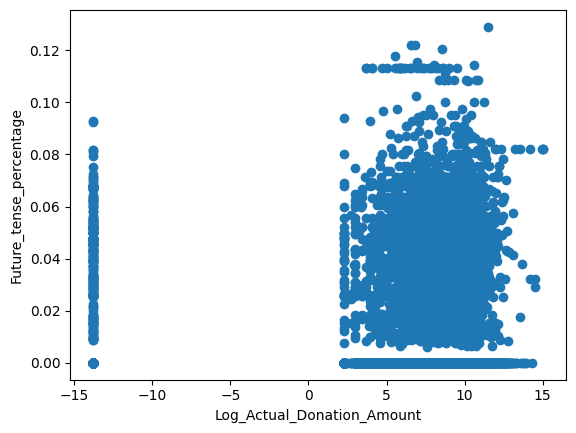

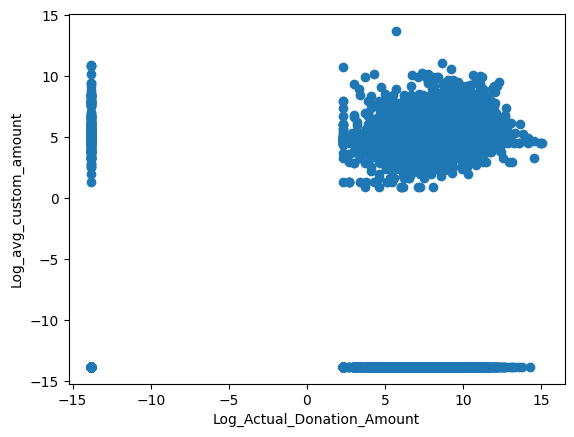

In [63]:
plt.scatter(extract_data["Log_Actual_Donation_Amount"], extract_data["Future_tense_percentage"])
#plt.xlim(0,30000)
#plt.ylim(0,30000)
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Future_tense_percentage')
plt.show()

#plt.subplot(222)
plt.scatter(extract_data["Log_Actual_Donation_Amount"], extract_data["Log_avg_custom_amount"])
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Log_avg_custom_amount')
plt.show()

In [65]:
extract_data["Campaign_Start_Year"] = pd.to_numeric(extract_data["Campaign_Start_Year"])
extract_data["Creator_Type"] = pd.to_numeric(extract_data["Creator_Type"])

In [66]:
Model1_variables = ['Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                      "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.313
Model:                                OLS   Adj. R-squared:                  0.313
Method:                     Least Squares   F-statistic:                     650.2
Date:                    Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                            21:40:03   Log-Likelihood:            -1.9295e+05
No. Observations:                   15699   AIC:                         3.859e+05
Df Residuals:                       15687   BIC:                         3.860e+05
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [67]:
Model2_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes']

import statsmodels.formula.api as smf
X2 = extract_data[Model2_variables] 
Y2 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
model2 = sm.OLS(Y2, X2).fit()

results2 = model2.summary()
#predicts = model2._results
print(results2)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.817
Model:                                    OLS   Adj. R-squared:                  0.816
Method:                         Least Squares   F-statistic:                     6349.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41857.
No. Observations:                       15699   AIC:                         8.374e+04
Df Residuals:                           15687   BIC:                         8.383e+04
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model 2

In [68]:
extract_data["Future_tense"] = pd.to_numeric(extract_data["Future_tense"])

In [69]:
Model2_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage']

import statsmodels.formula.api as smf
X2 = extract_data[Model2_variables] 
Y2 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
model2 = sm.OLS(Y2, X2).fit()

results2 = model2.summary()
#predicts = model2._results
print(results2)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.817
Model:                                    OLS   Adj. R-squared:                  0.817
Method:                         Least Squares   F-statistic:                     5851.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41822.
No. Observations:                       15699   AIC:                         8.367e+04
Df Residuals:                           15686   BIC:                         8.377e+04
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model3

In [70]:
Model3_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount']

import statsmodels.formula.api as smf
X3 = extract_data[Model3_variables] 
Y3 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X3 = sm.add_constant(X3) # adding a constant
model3 = sm.OLS(Y3, X3).fit()

results3 = model3.summary()
#predicts = model3._results
print(results3)


                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.818
Model:                                    OLS   Adj. R-squared:                  0.817
Method:                         Least Squares   F-statistic:                     5409.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41812.
No. Observations:                       15699   AIC:                         8.365e+04
Df Residuals:                           15685   BIC:                         8.376e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model4


In [71]:
Model4_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_percentage_X_Campaign_frequency']

import statsmodels.formula.api as smf
X4 = extract_data[Model4_variables] 
Y4 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X4 = sm.add_constant(X4) # adding a constant
model4 = sm.OLS(Y4, X4).fit()

results4 = model4.summary()
#predicts = model4._results
print(results4)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.818
Model:                                    OLS   Adj. R-squared:                  0.818
Method:                         Least Squares   F-statistic:                     5042.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41788.
No. Observations:                       15699   AIC:                         8.361e+04
Df Residuals:                           15684   BIC:                         8.372e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Model5-1

In [72]:
Model5_variables_1 = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X5 = extract_data[Model5_variables_1] 
Y5 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X5 = sm.add_constant(X5) # adding a constant
model5_1 = sm.OLS(Y5, X5).fit()

results5_1 = model5_1.summary()
#predicts = model4._results
print(results5_1)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.820
Model:                                    OLS   Adj. R-squared:                  0.820
Method:                         Least Squares   F-statistic:                     5113.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41697.
No. Observations:                       15699   AIC:                         8.342e+04
Df Residuals:                           15684   BIC:                         8.354e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

# Model5-2

In [73]:
Model5_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_percentage_X_Campaign_frequency',
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X5 = extract_data[Model5_variables] 
Y5 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X5 = sm.add_constant(X5) # adding a constant
model5 = sm.OLS(Y5, X5).fit()

results5 = model5.summary()
#predicts = model4._results
print(results5)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.821
Model:                                    OLS   Adj. R-squared:                  0.821
Method:                         Least Squares   F-statistic:                     4796.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:04   Log-Likelihood:                -41665.
No. Observations:                       15699   AIC:                         8.336e+04
Df Residuals:                           15683   BIC:                         8.348e+04
Df Model:                                  15                                         
Covariance Type:                    nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Model 6

In [74]:
Model6_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_X_Campaign_frequency',
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X6 = extract_data[Model6_variables] 
Y6 = extract_data['Log_Distinct_Donors']
# with statsmodels
X6 = sm.add_constant(X6) # adding a constant
model6 = sm.OLS(Y6, X6).fit()

results6 = model6.summary()
#predicts = model4._results
print(results6)



                             OLS Regression Results                            
Dep. Variable:     Log_Distinct_Donors   R-squared:                       0.818
Model:                             OLS   Adj. R-squared:                  0.818
Method:                  Least Squares   F-statistic:                     4691.
Date:                 Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                         21:40:04   Log-Likelihood:                -37893.
No. Observations:                15699   AIC:                         7.582e+04
Df Residuals:                    15683   BIC:                         7.594e+04
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
Model6_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_X_Campaign_frequency',
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X6 = extract_data[Model6_variables] 
Y6 = extract_data['Log_campaign_success']
# with statsmodels
X6 = sm.add_constant(X6) # adding a constant
model6 = sm.OLS(Y6, X6).fit()

results6 = model6.summary()
#predicts = model4._results
print(results6)



                             OLS Regression Results                             
Dep. Variable:     Log_campaign_success   R-squared:                       0.762
Model:                              OLS   Adj. R-squared:                  0.762
Method:                   Least Squares   F-statistic:                     3355.
Date:                  Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                          01:56:14   Log-Likelihood:                -35949.
No. Observations:                 15699   AIC:                         7.193e+04
Df Residuals:                     15683   BIC:                         7.205e+04
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from pyprocessmacro import Process

warnings.filterwarnings("ignore", category=DeprecationWarning)


p = Process(data=extract_data, model=4, x="Future_tense", y="Log_Actual_Donation_Amount", m=["Campaign_frequency"])
p.summary()



Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = Future_tense
    y = Log_Actual_Donation_Amount
    m1 = Campaign_frequency

Sample size:
15699

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Log_Actual_Donation_Amount 
OLS Regression Summary

     R²  Adj. R²     MSE         F  df1    df2  p-value
 0.3173   0.3172 45.1039 3648.0503    2  15696   0.0000

Coefficients

                     coeff     se        t      p    LLCI    ULCI
Cons                5.1696 0.0637  81.1065 0.0000  5.0447  5.2945
Future_tense        0.4022 0.0307  13.0937 0.0000  0.3420  0.4624
Campaign_frequency -0.0187 0.0002 -81.9193 0.0000 -0.0192 -0.0183



# Log Transformation

In [ ]:
extract_data = extract_data.rename(columns={'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month':'Campaign_frequency'})

In [ ]:
extract_data['Campaign_frequency'] =  pd.to_numeric(extract_data['Campaign_frequency'])

extract_data['Campaign_Start_Year'] =  pd.to_numeric(extract_data['Campaign_Start_Year'])

In [99]:
extract_data['Log_Actual_Donation_Amount']=0
extract_data['Log_Distinct_Donors'] = 0
extract_data['Log_Campaign_Goal'] = 0
extract_data['Log_Campaign_Duration'] = 0
extract_data['Log_avg_custom_amount'] = 0
extract_data.loc[index,'Future_tense_X_Campaign_frequency'] = 0
extract_data.loc[index,'Campaign_frequency_X_Log_avg_custom_amount'] = 0
extract_data['Campaign_success'] = 0
extract_data['Log_campaign_success'] = 0
eps = 1
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount'] > 0:
        extract_data.loc[index,'Log_Actual_Donation_Amount'] = np.log(extract_data.loc[index,'Actual_Donation_Amount'])
    else:
        extract_data.loc[index,'Log_Actual_Donation_Amount'] = np.log(eps)
    if extract_data.loc[index,'Distinct_Donors'] > 0:
        extract_data.loc[index,'Log_Distinct_Donors'] = np.log(extract_data.loc[index,'Distinct_Donors'])
    else:
        extract_data.loc[index,'Log_Distinct_Donors'] = np.log(eps)
    if extract_data.loc[index,'Campaign_Goal'] > 0:
        extract_data.loc[index,'Log_Campaign_Goal'] = np.log(extract_data.loc[index,'Campaign_Goal'])
    else:
        extract_data.loc[index,'Log_Campaign_Goal'] = np.log(eps)
    if extract_data.loc[index,'Campaign_Duration'] > 0:
        extract_data.loc[index,'Log_Campaign_Duration'] = np.log(extract_data.loc[index,'Campaign_Duration'])
    else:
        extract_data.loc[index,'Log_Campaign_Duration'] = np.log(eps)
    if extract_data.loc[index,'Avg_custom_amount'] > 0:
        extract_data.loc[index,'Log_avg_custom_amount'] = np.log(extract_data.loc[index,'Avg_custom_amount'])
    else:
        extract_data.loc[index,'Log_avg_custom_amount'] = np.log(eps)
    if extract_data.loc[index,'Campaign_Goal'] > 0 and extract_data.loc[index,'Distinct_Donors'] > 0: 
        extract_data.loc[index,'Log_campaign_success'] = np.log( extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal'])
        extract_data.loc[index,'Campaign_success'] = extract_data.loc[index,'Actual_Donation_Amount']/extract_data.loc[index,'Campaign_Goal']
    else:
        extract_data.loc[index,'Log_campaign_success'] = np.log(eps)

    if extract_data.loc[index,'Org_causes'] > 0:
        extract_data.loc[index,'Log_Org_causes'] = np.log(extract_data.loc[index,'Org_causes'])
    else:
        extract_data.loc[index,'Log_Org_causes'] = np.log(eps)


    extract_data.loc[index,'Future_tense_X_Campaign_frequency'] = extract_data.loc[index, 'Future_tense'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Future_tense_percentage_X_Campaign_frequency'] = extract_data.loc[index, 'Future_tense_percentage'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Campaign_frequency_X_Log_avg_custom_amount'] = extract_data.loc[index, 'Campaign_frequency'] * extract_data.loc[index,'Log_avg_custom_amount']


In [ ]:
np.exp(10)

22026.465794806718

In [ ]:
np.log(5)

0.6989700043360189

In [ ]:
#extract_data.to_csv("20_5_2023.csv")

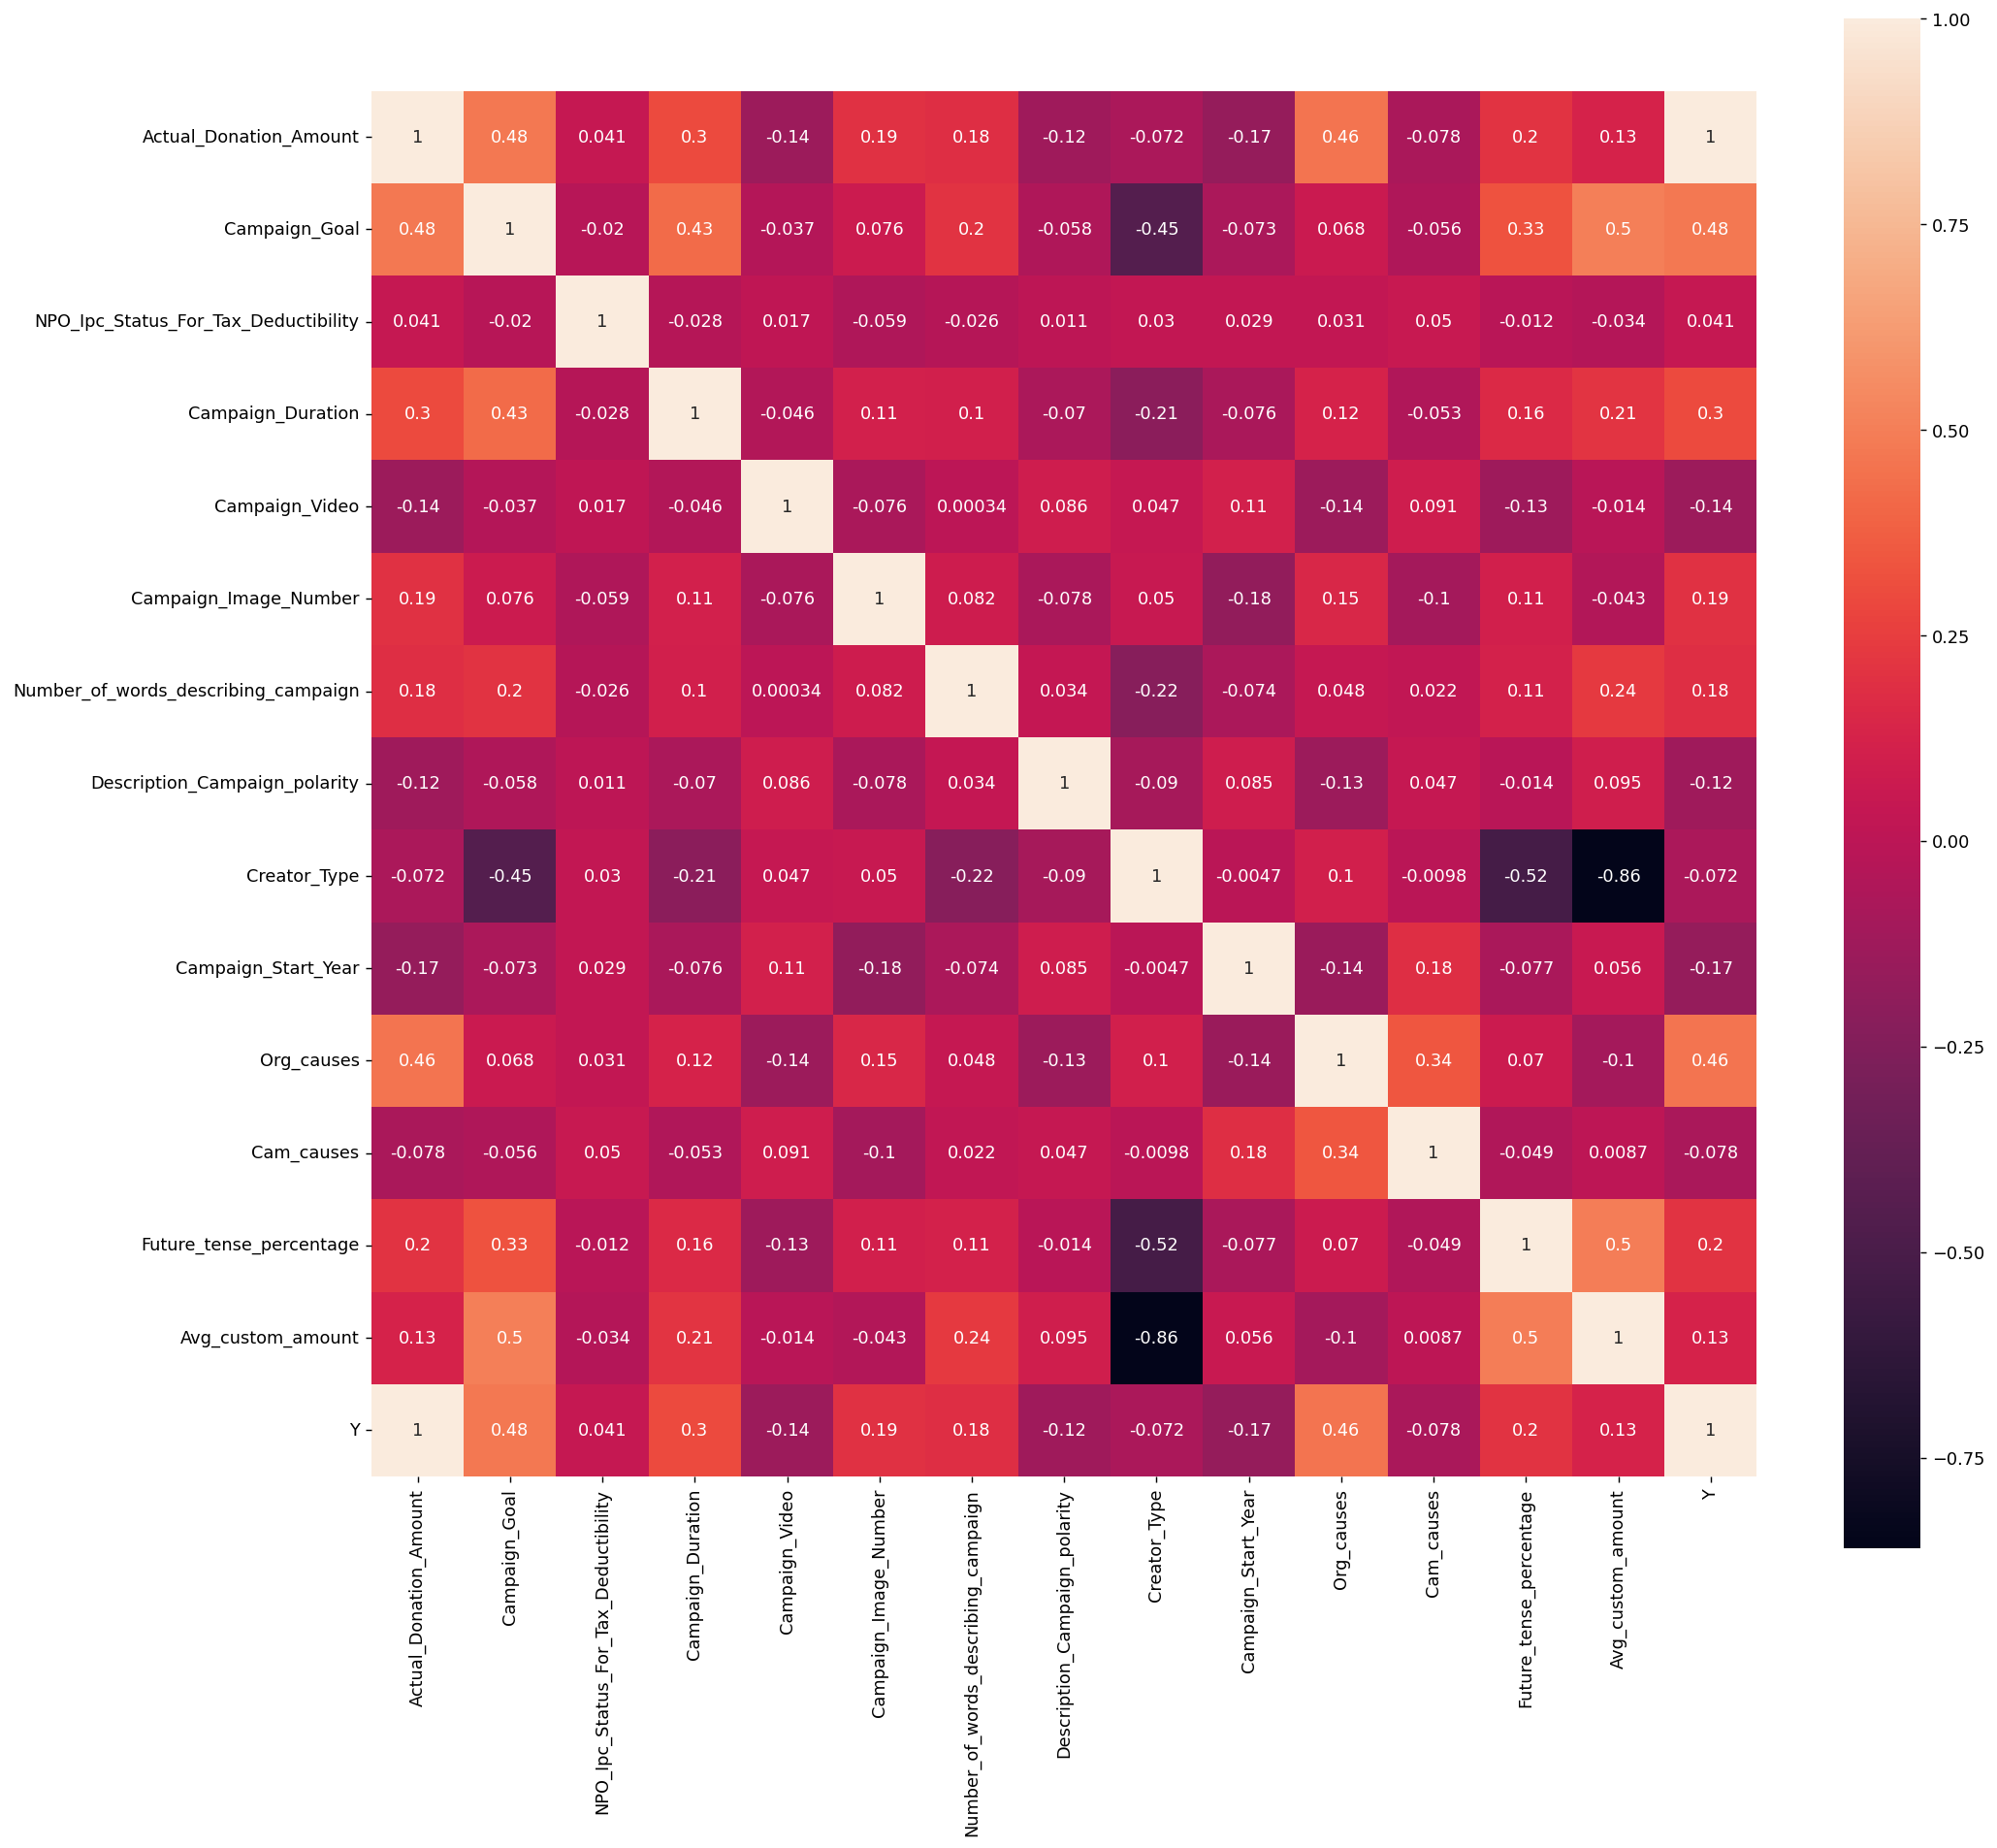

In [ ]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Actual_Donation_Amount', 'Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Avg_custom_amount']

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Actual_Donation_Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

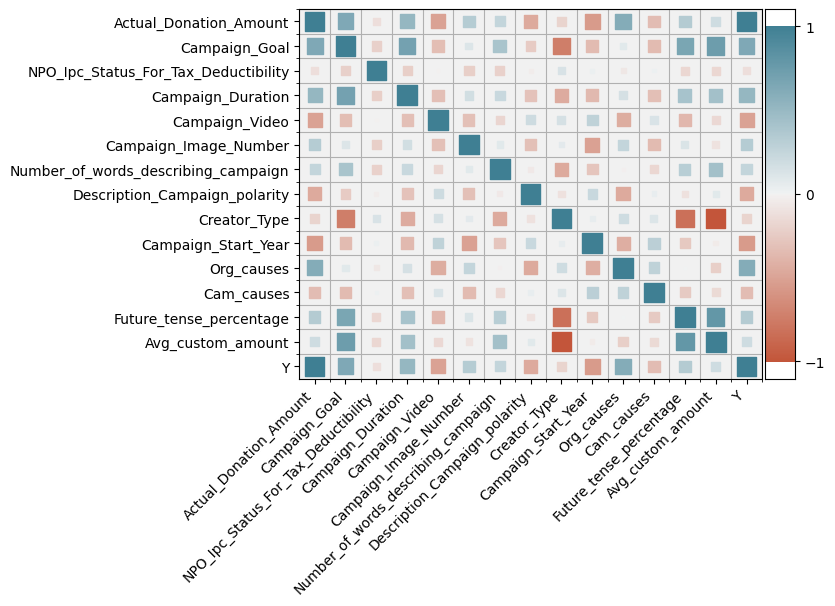

In [ ]:
# pip install heatmapz

from heatmap import heatmap, corrplot

corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

Do a scatter plot, using IV with a DV 

Scatter plot 1
Actual_Donation_Amount + Campaign Promise

Scatter plot 2
Actual_Donation_Amount + Campaign Promise

Scatter plot 3
Number of Distinct_Donors   + Campaign Promise

Scatter plot 4 
Number of Distinct_Donors  + Campaign Promise

In [ ]:
extract_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name*',
       'Receiving_NPO_Id*', 'NPO_Status', 'Campaign_frequency',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status', 'Actual_Donation_Amount', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Image1_Id',
       'Campaign_Image2_Id', 'Campaign_Image3_Id', 'Campaign_Image4_Id',
       'Campaign_Image5_Id', 'Campaign_Video', 'Impact_Message_1',
       'Impact_Message_2', 'Impact_Message_3', 'Impact_Message_4',
       'Impact_Message_5', 'Custom_Amount_1', 'Custom_Amount_2',
       'Custom_Amount_3', 'Custom_Amount_4', 'Description_of_Campaign',
       'Description_of_NPO', 'Campaign_Title_y', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_&_Heritage', 'Org_Cause_Children_&_Youth',
       'Org_Cause_Community', 'Org_Cause_Disability'

In [ ]:
'''
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(222)
plt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(223)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(224)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.show()
'''

'\nplt.figure(figsize=(15,15))\n\nplt.subplot(221)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(222)\nplt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(223)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(224)\nplt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.show()\n'

Text(0, 0.5, 'Number')

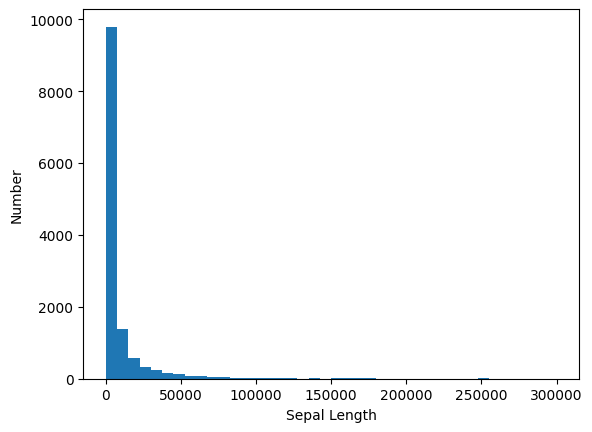

In [ ]:
plt.hist(extract_data['Actual_Donation_Amount'], bins=40, range=(0,300000))
plt.xlabel('Sepal Length'); plt.ylabel('Number')

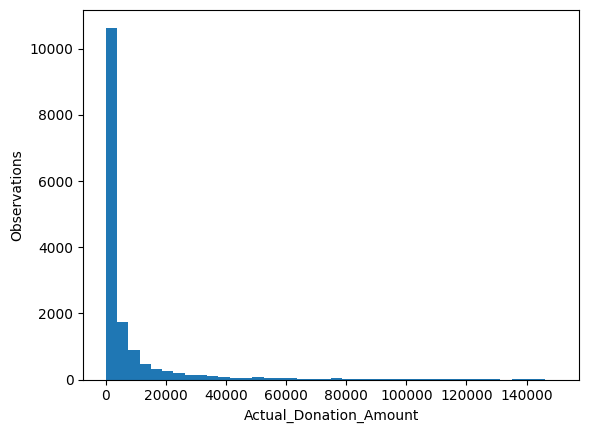

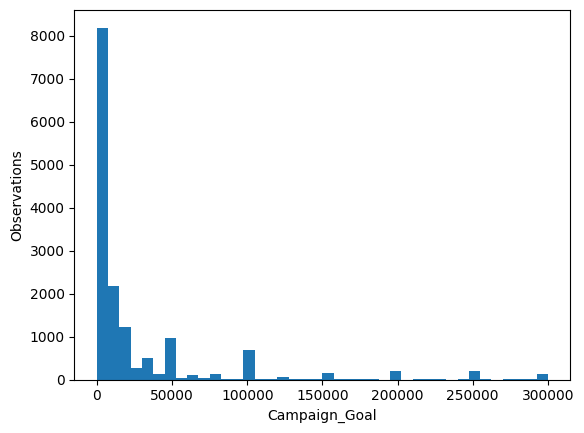

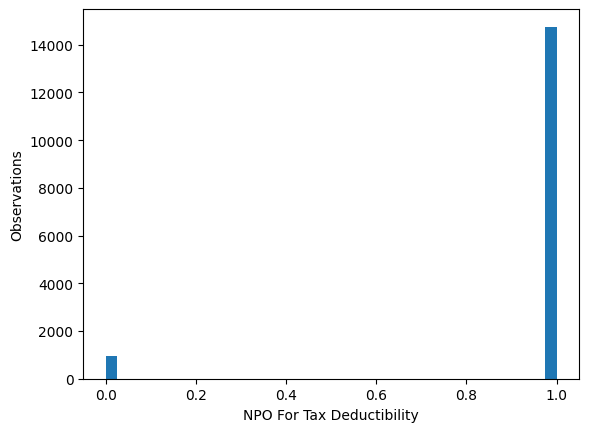

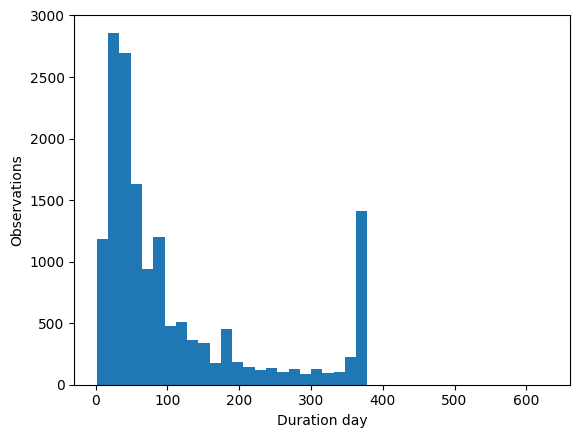

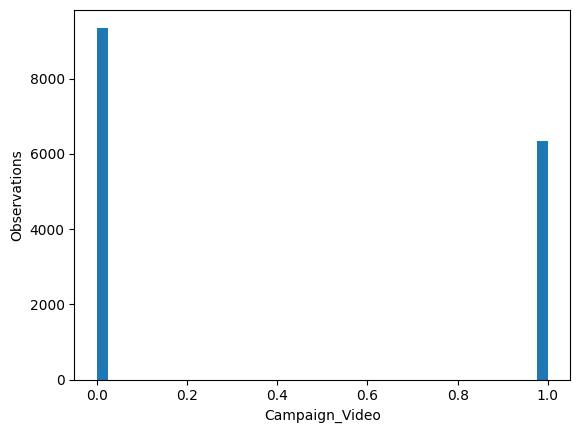

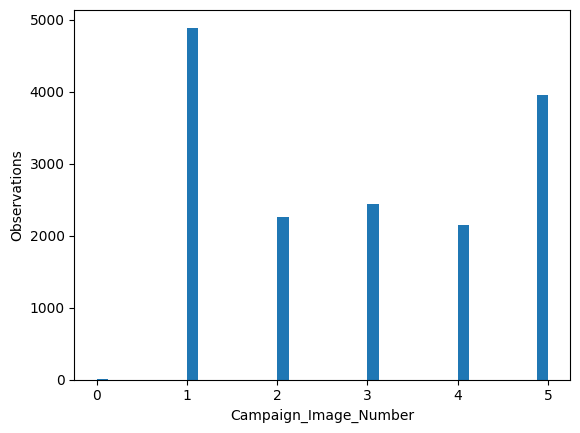

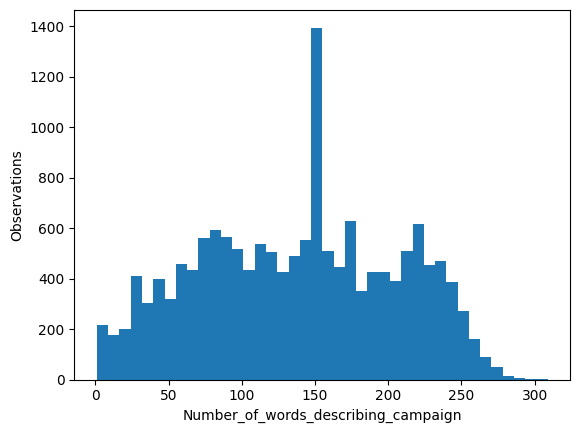

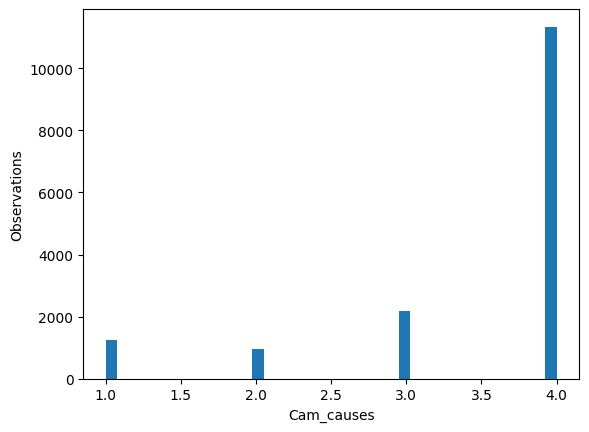

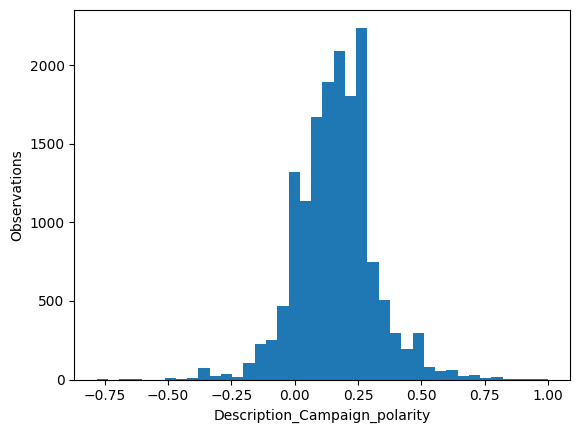

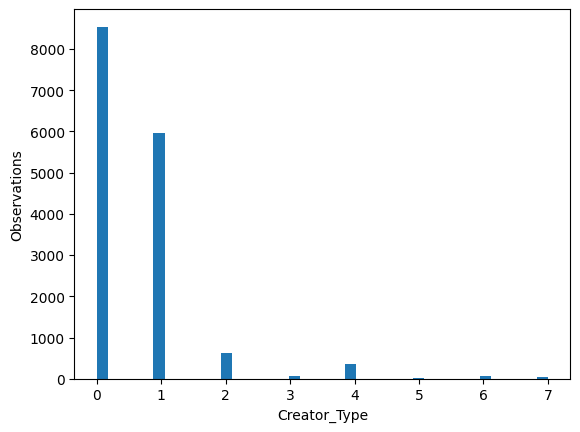

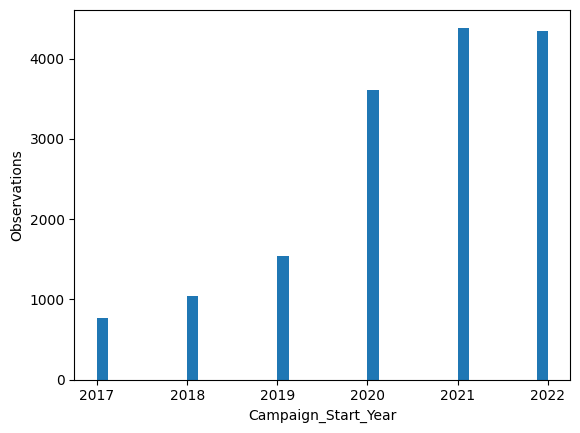

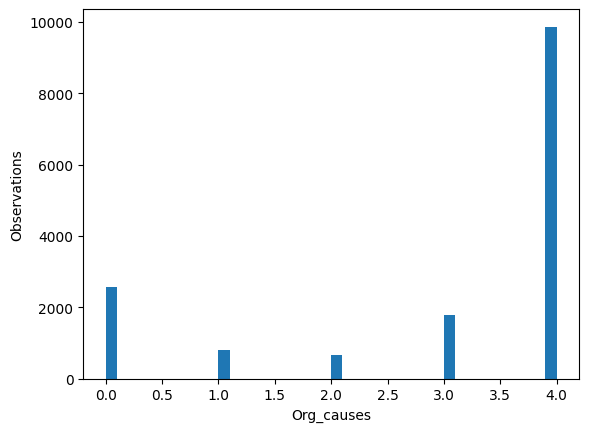

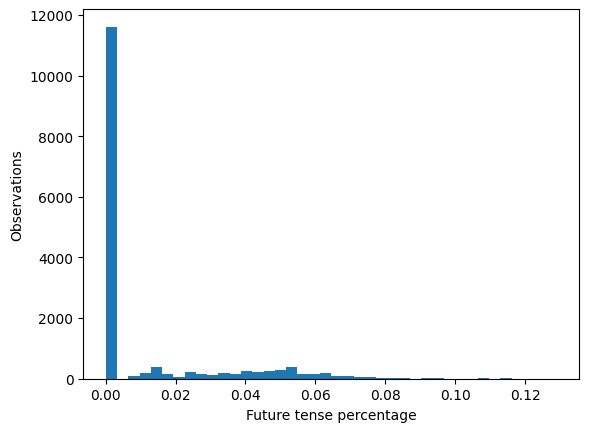

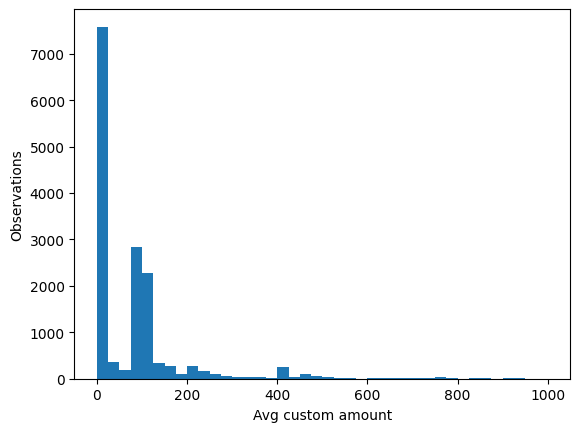

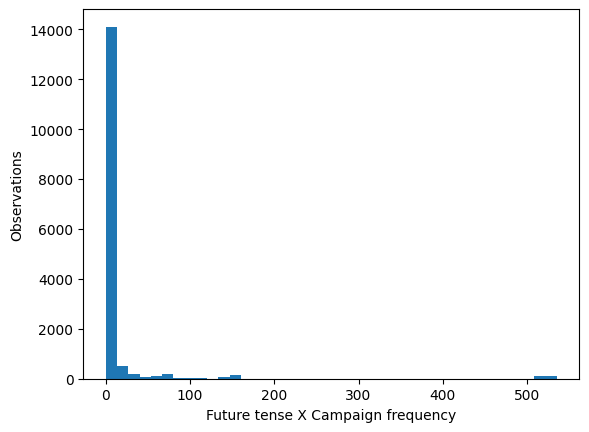

In [ ]:
#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Actual_Donation_Amount'], bins=40, range=(0,150000))
plt.xlabel('Actual_Donation_Amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Campaign_Goal'], bins=40, range=(0,300000))
plt.xlabel('Campaign_Goal'); plt.ylabel('Observations')
plt.show()

#plt.subplot(443)
plt.hist(extract_data['NPO_Ipc_Status_For_Tax_Deductibility'], bins=40)
plt.xlabel('NPO For Tax Deductibility'); plt.ylabel('Observations')
plt.show()
#plt.subplot(444)
plt.hist(extract_data['Campaign_Duration'], bins=40)
plt.xlabel('Duration day'); plt.ylabel('Observations')
plt.show()
#plt.subplot(445)
plt.hist(extract_data['Campaign_Video'], bins=40)
plt.xlabel('Campaign_Video'); plt.ylabel('Observations')
plt.show()

#plt.subplot(446)
plt.hist(extract_data['Campaign_Image_Number'], bins=40)
plt.xlabel('Campaign_Image_Number'); plt.ylabel('Observations')
plt.show()

#plt.subplot(447)
plt.hist(extract_data['Number_of_words_describing_campaign'], bins=40)
plt.xlabel('Number_of_words_describing_campaign'); plt.ylabel('Observations')
plt.show()

#plt.subplot(448)
plt.hist(extract_data['Cam_causes'], bins=40)
plt.xlabel('Cam_causes'); plt.ylabel('Observations')
plt.show()

#plt.subplot(449)
plt.hist(extract_data['Description_Campaign_polarity'], bins=40)
plt.xlabel('Description_Campaign_polarity'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,10)
plt.hist(extract_data['Creator_Type'], bins=40)
plt.xlabel('Creator_Type'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,11)
plt.hist(extract_data['Campaign_Start_Year'], bins=40)
plt.xlabel('Campaign_Start_Year'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,12)
plt.hist(extract_data['Org_causes'], bins=40)
plt.xlabel('Org_causes'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,13)
plt.hist(extract_data['Future_tense_percentage'], bins=40)
plt.xlabel('Future tense percentage'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,14)
plt.hist(extract_data['Avg_custom_amount'], bins=40, range=(0,1000))
plt.xlabel('Avg custom amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,15)
plt.hist(extract_data['Future_tense_X_Campaign_frequency'], bins=40)
plt.xlabel('Future tense X Campaign frequency'); plt.ylabel('Observations')
plt.show()


In [ ]:
numeric_features1

['Log_Actual_Donation_Amount',
 'Log_Campaign_Goal',
 'NPO_Ipc_Status_For_Tax_Deductibility',
 'Log_Campaign_Duration',
 'Campaign_Video',
 'Campaign_Image_Number',
 'Number_of_words_describing_campaign',
 'Description_Campaign_polarity',
 'Creator_Type',
 'Campaign_Start_Year',
 'Org_causes',
 'Cam_causes',
 'Future_tense',
 'Log_avg_custom_amount',
 'Future_tense_X_Campaign_frequency',
 'Campaign_frequency_X_Log_avg_custom_amount']

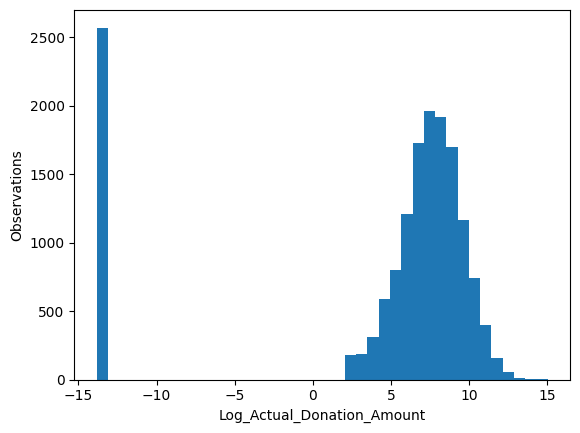

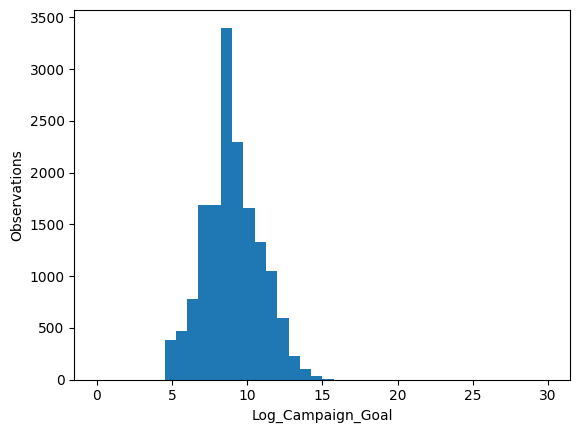

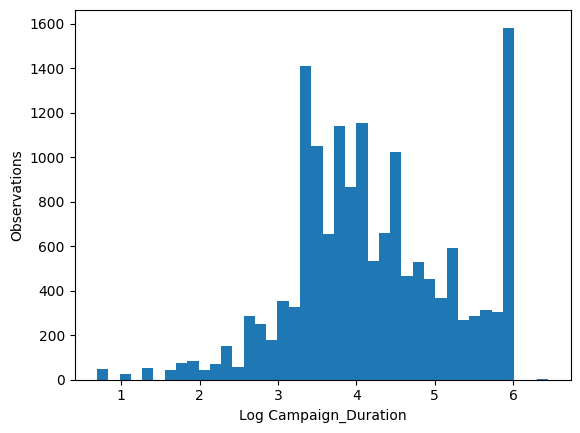

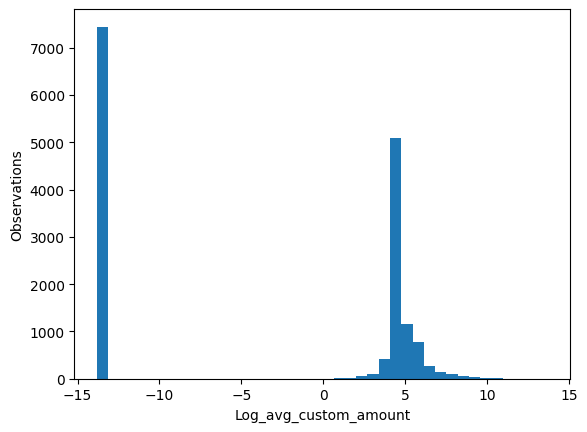

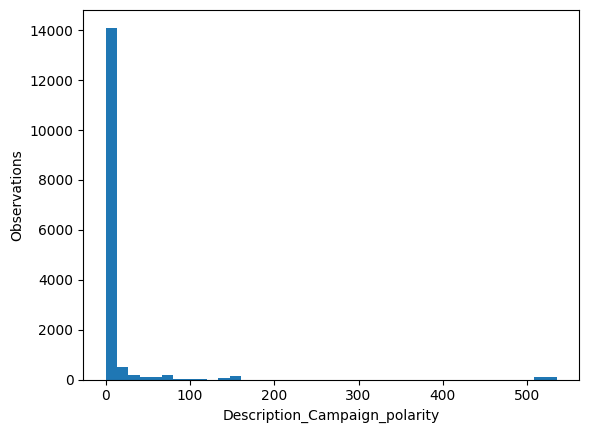

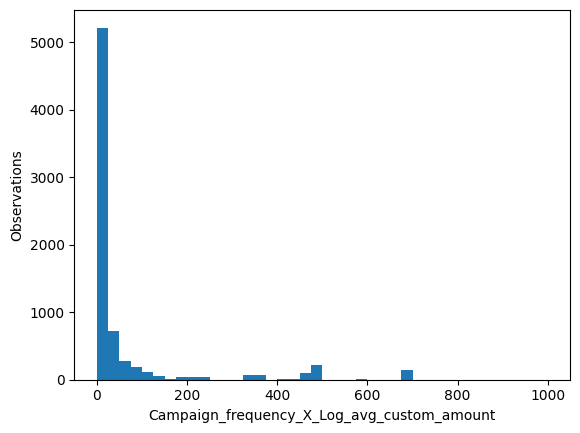

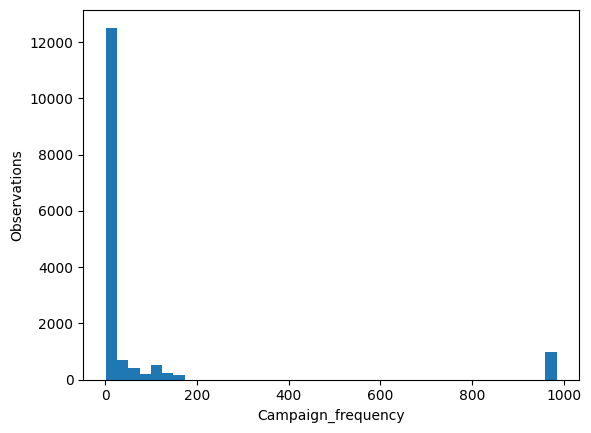

In [ ]:

numeric_features1

#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Log_Actual_Donation_Amount'], bins=40)
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Log_Campaign_Goal'], bins=40, range=(0,30))
plt.xlabel('Log_Campaign_Goal'); plt.ylabel('Observations')
plt.show()


#plt.subplot(444)
plt.hist(extract_data['Log_Campaign_Duration'], bins=40)
plt.xlabel('Log Campaign_Duration'); plt.ylabel('Observations')
plt.show()

#plt.subplot(445)
plt.hist(extract_data['Log_avg_custom_amount'], bins=40)
plt.xlabel('Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()


#plt.subplot(449)
plt.hist(extract_data['Future_tense_X_Campaign_frequency'], bins=40)
plt.xlabel('Description_Campaign_polarity'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,14)
plt.hist(extract_data['Campaign_frequency_X_Log_avg_custom_amount'], bins=40, range=(0,1000))
plt.xlabel('Campaign_frequency_X_Log_avg_custom_amount'); plt.ylabel('Observations')
plt.show()


plt.hist(extract_data['Campaign_frequency'], bins=40)
plt.xlabel('Campaign_frequency'); plt.ylabel('Observations')
plt.show()




<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [ ]:
def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features2]
for i in numeric_features2:
	print(i, "\t", vif(df=test_data, col_i=i))


Campaign_Goal 	 1.074208525023968
NPO_Ipc_Status_For_Tax_Deductibility 	 1.0135782867855325
Campaign_Duration 	 1.0944560661147735
Campaign_Video 	 1.0616484283746896
Campaign_Image_Number 	 1.0932186081834006
Number_of_words_describing_campaign 	 1.0345705611722469
Description_Campaign_polarity 	 1.0241247058131886
Creator_Type 	 1.1872538399750625
Campaign_Start_Year 	 1.13160906658436
Org_causes 	 1.232413811109646
Cam_causes 	 1.1995125335277836
Future_tense 	 1.1781728637442956
Avg_custom_amount 	 1.016775682217701


In [ ]:
import numpy as np
import pandas as pd

#create dataset
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#view dataset
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Actual_Donation_Amount ~ Campaign_Goal + NPO_Ipc_Status_For_Tax_Deductibility + Campaign_Duration+\
                     Campaign_Video + Campaign_Image_Number + Number_of_words_describing_campaign + Description_Campaign_polarity\
                     + Creator_Type + Campaign_Start_Year + Org_causes', data=extract_data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif



,VIF,variable
0,2.173969e+06,Intercept
1,1.053693e+00,Campaign_Goal
2,1.011229e+00,NPO_Ipc_Status_For_Tax_Deductibility
3,1.083661e+00,Campaign_Duration
4,1.042941e+00,Campaign_Video
5,1.075709e+00,Campaign_Image_Number
6,1.034212e+00,Number_of_words_describing_campaign
7,1.021759e+00,Description_Campaign_polarity
8,1.061611e+00,Creator_Type
9,1.053808e+00,Campaign_Start_Year


In [ ]:
extract_data[numeric_features1].dtypes

Actual_Donation_Amount                  float64
Campaign_Goal                             int64
NPO_Ipc_Status_For_Tax_Deductibility      int64
Campaign_Duration                         int64
Campaign_Video                            int64
Campaign_Image_Number                     int64
Number_of_words_describing_campaign       int64
Description_Campaign_polarity           float64
Creator_Type                              int64
Campaign_Start_Year                       int64
Org_causes                                int64
Cam_causes                                int64
Future_tense_percentage                 float64
Avg_custom_amount                       float64
dtype: object

In [ ]:
test_data = extract_data[numeric_features1[1:]]
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

#x = test_data
x = add_constant(test_data)


# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(vif)


[2329873.411556508, 1.0759566472411985, 1.013679213022417, 1.0937133912859953, 1.0631054020395836, 1.0877957007364183, 1.0344006919650544, 1.023599694172131, 1.1908235668981604, 1.1307615824241095, 1.2347188838404943, 1.1988131782227718, 1.1798167055180615, 1.016853782300319]


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(tol)


[4.2920786813560596e-07, 0.9294054761072811, 0.986505382721985, 0.9143163172064608, 0.9406405028903861, 0.9192902668424023, 0.9667433594812246, 0.976944410684669, 0.8397549626976104, 0.8843597231665894, 0.809900952425365, 0.8341583310607994, 0.8475892868129008, 0.9834255597081102]


# <font size =6 face = 'time new roman' color = red> Based on the result only the "Custom_Amount1-4" 's multi collinearity is high. Other variables seem reasonable.</font>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant 
X = test_data  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds) 

Campaign_Goal                            1.166631
NPO_Ipc_Status_For_Tax_Deductibility    16.872163
Campaign_Duration                        2.168084
Campaign_Video                           1.780458
Campaign_Image_Number                    4.582998
Number_of_words_describing_campaign      5.371785
Description_Campaign_polarity            2.201641
Creator_Type                             1.690182
Campaign_Start_Year                     43.296004
Org_causes                               5.796586
Cam_causes                              17.396246
Future_tense_percentage                  1.492684
Avg_custom_amount                        1.017647
dtype: float64


In [ ]:
'''
Clean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr

     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)

     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')

'''

"\nClean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr\n\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)\n\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n\n"

In [ ]:
extract_data

,Campaign_Id,Campaign_Title_x,Receiving_NPO_Name*,Receiving_NPO_Id*,NPO_Status,Campaign_frequency,Public_Campaign_Access,Creator_Type,Creator_Id,Campaign_Status,...,Log_Distinct_Donors,Log_Campaign_Goal,Log_Campaign_Duration,Log_avg_custom_amount,Future_tense_X_Campaign_frequency,Campaign_frequency_X_Log_avg_custom_amount,Campaign_success,Log_campaign_success,Log_Org_causes,Future_tense_percentage_X_Campaign_frequency
0,4608063,World Suicide Prevention Day 2017,Samaritans of Singapore,3102869,True,1,1,0,3102869,ENDED,...,4.189655,10.819778,5.529429,4.499810,1.0,4.499810,0.111220,-2.196245,1.386294,0.012048
1,4648574,Enabling Lives,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,0,3105759,ENDED,...,3.465736,9.903488,4.488636,4.499810,0.0,8.999619,0.140500,-1.962548,1.386294,0.000000
2,4661665,SPD Charity Hongbao 2017,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,0,3105759,ENDED,...,3.091042,10.308953,4.060443,4.499810,0.0,8.999619,0.037267,-3.289656,1.386294,0.000000
3,4716038,Sundown Run 2017 - Running 4 HFH,Habitat for Humanity Singapore Ltd,3706352,True,2,1,1,4614452,ENDED,...,1.945910,7.600902,4.477337,-13.815511,0.0,-27.631021,1.400000,0.336472,1.386294,0.000000
4,4729527,Child For Child,Children's Cancer Foundation,3105049,False,2,1,1,4697816,ENDED,...,3.295837,8.517193,3.912023,-13.815511,0.0,-27.631021,0.406000,-0.901402,1.098612,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,81620010,#EndowusGivesBack to Gardens by the Bay,Gardens by the Bay,44329126,True,2,1,2,67580280,ACTIVE,...,0.000000,8.517193,4.127134,-13.815511,0.0,-27.631021,0.002000,-6.214608,1.386294,0.000000
15975,81633179,Support Loke Chui Yee in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,1,63267540,ACTIVE,...,1.386294,9.210340,3.401197,-13.815511,0.0,-69.077553,0.015000,-4.199705,0.000000,0.000000
15976,81633303,Support Derek Tse in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,1,63267540,ACTIVE,...,2.302585,6.907755,3.401197,-13.815511,0.0,-69.077553,1.000000,0.000000,0.000000,0.000000
15977,81635547,WE@SG Trivia Night,Daughters Of Tomorrow Limited,3675791,True,4,1,1,81631190,ACTIVE,...,0.693147,8.006368,4.110874,-13.815511,0.0,-55.262042,0.040000,-3.218876,1.098612,0.000000


<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [ ]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [ ]:
for title in numeric_features1:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    #print( title, "Variance:" ,np.var(extract_data[title]))
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))
    

Actual_Donation_Amount Median: 9984.546404229568
Actual_Donation_Amount Std: 63523.81739204215
Actual_Donation_Amount Min: 0.0
Actual_Donation_Amount Max: 3431670.0
Campaign_Goal Median: 45030.1663800242
Campaign_Goal Std: 154459.926444838
Campaign_Goal Min: 100
Campaign_Goal Max: 5000000
NPO_Ipc_Status_For_Tax_Deductibility Median: 0.9399324797757819
NPO_Ipc_Status_For_Tax_Deductibility Std: 0.23761189624749696
NPO_Ipc_Status_For_Tax_Deductibility Min: 0
NPO_Ipc_Status_For_Tax_Deductibility Max: 1
Campaign_Duration Median: 109.14599656029047
Campaign_Duration Std: 110.03639912685077
Campaign_Duration Min: 2
Campaign_Duration Max: 630
Campaign_Video Median: 0.4040384737881394
Campaign_Video Std: 0.4907049882435376
Campaign_Video Min: 0
Campaign_Video Max: 1
Campaign_Image_Number Median: 2.8712019873877317
Campaign_Image_Number Std: 1.5891370044097857
Campaign_Image_Number Min: 0
Campaign_Image_Number Max: 5
Number_of_words_describing_campaign Median: 137.94904134021274
Number_of_words_

# New Version 1 model

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [ ]:
extract_data["Campaign_Start_Year"] = pd.to_numeric(extract_data["Campaign_Start_Year"])
extract_data["Creator_Type"] = pd.to_numeric(extract_data["Creator_Type"])

In [ ]:

import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Ipc_Status_For_Tax_Deductibility  +Campaign_Video+ \
    Campaign_Image_Number  + Number_of_words_describing_campaign  + Org_causes  + Description_Campaign_polarity+\
       Campaign_Duration', data = extract_data).fit()

results2 = model2.summary()
print(results2)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.336
Model:                                OLS   Adj. R-squared:                  0.335
Method:                     Least Squares   F-statistic:                     828.7
Date:                    Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                            18:51:26   Log-Likelihood:            -1.6227e+05
No. Observations:                   13128   AIC:                         3.246e+05
Df Residuals:                       13119   BIC:                         3.246e+05
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
Model1_variables = ['Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                      "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.313
Model:                                OLS   Adj. R-squared:                  0.313
Method:                     Least Squares   F-statistic:                     650.2
Date:                    Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                            21:40:03   Log-Likelihood:            -1.9295e+05
No. Observations:                   15699   AIC:                         3.859e+05
Df Residuals:                       15687   BIC:                         3.860e+05
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# Model 2

In [ ]:
extract_data["Future_tense"] = pd.to_numeric(extract_data["Future_tense"])

In [ ]:
Model2_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage']

import statsmodels.formula.api as smf
X2 = extract_data[Model2_variables] 
Y2 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
model2 = sm.OLS(Y2, X2).fit()

results2 = model2.summary()
#predicts = model2._results
print(results2)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.817
Model:                                    OLS   Adj. R-squared:                  0.817
Method:                         Least Squares   F-statistic:                     5851.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41822.
No. Observations:                       15699   AIC:                         8.367e+04
Df Residuals:                           15686   BIC:                         8.377e+04
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model3

In [ ]:
Model3_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount']

import statsmodels.formula.api as smf
X3 = extract_data[Model3_variables] 
Y3 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X3 = sm.add_constant(X3) # adding a constant
model3 = sm.OLS(Y3, X3).fit()

results3 = model3.summary()
#predicts = model3._results
print(results3)


                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.818
Model:                                    OLS   Adj. R-squared:                  0.817
Method:                         Least Squares   F-statistic:                     5409.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41812.
No. Observations:                       15699   AIC:                         8.365e+04
Df Residuals:                           15685   BIC:                         8.376e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# Model4


In [ ]:
Model4_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_percentage_X_Campaign_frequency']

import statsmodels.formula.api as smf
X4 = extract_data[Model4_variables] 
Y4 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X4 = sm.add_constant(X4) # adding a constant
model4 = sm.OLS(Y4, X4).fit()

results4 = model4.summary()
#predicts = model4._results
print(results4)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.818
Model:                                    OLS   Adj. R-squared:                  0.818
Method:                         Least Squares   F-statistic:                     5042.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41788.
No. Observations:                       15699   AIC:                         8.361e+04
Df Residuals:                           15684   BIC:                         8.372e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Model5-1

In [ ]:
Model5_variables_1 = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X5 = extract_data[Model5_variables_1] 
Y5 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X5 = sm.add_constant(X5) # adding a constant
model5_1 = sm.OLS(Y5, X5).fit()

results5_1 = model5_1.summary()
#predicts = model4._results
print(results5_1)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.820
Model:                                    OLS   Adj. R-squared:                  0.820
Method:                         Least Squares   F-statistic:                     5113.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:03   Log-Likelihood:                -41697.
No. Observations:                       15699   AIC:                         8.342e+04
Df Residuals:                           15684   BIC:                         8.354e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

# Model5-2

In [ ]:
Model5_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_percentage_X_Campaign_frequency',
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X5 = extract_data[Model5_variables] 
Y5 = extract_data['Log_Actual_Donation_Amount']
# with statsmodels
X5 = sm.add_constant(X5) # adding a constant
model5 = sm.OLS(Y5, X5).fit()

results5 = model5.summary()
#predicts = model4._results
print(results5)

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.821
Model:                                    OLS   Adj. R-squared:                  0.821
Method:                         Least Squares   F-statistic:                     4796.
Date:                        Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                                21:40:04   Log-Likelihood:                -41665.
No. Observations:                       15699   AIC:                         8.336e+04
Df Residuals:                           15683   BIC:                         8.348e+04
Df Model:                                  15                                         
Covariance Type:                    nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------

# Model 6

In [ ]:
Model6_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_X_Campaign_frequency',
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X6 = extract_data[Model6_variables] 
Y6 = extract_data['Log_Distinct_Donors']
# with statsmodels
X6 = sm.add_constant(X6) # adding a constant
model6 = sm.OLS(Y6, X6).fit()

results6 = model6.summary()
#predicts = model4._results
print(results6)



                             OLS Regression Results                            
Dep. Variable:     Log_Distinct_Donors   R-squared:                       0.818
Model:                             OLS   Adj. R-squared:                  0.818
Method:                  Least Squares   F-statistic:                     4691.
Date:                 Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                         21:40:04   Log-Likelihood:                -37893.
No. Observations:                15699   AIC:                         7.582e+04
Df Residuals:                    15683   BIC:                         7.594e+04
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
Model6_variables = ['Log_Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Log_Campaign_Duration',
                     'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign', 'Description_Campaign_polarity',
                     "Creator_Type", "Campaign_Start_Year", 'Org_causes', 'Cam_causes', 'Future_tense_percentage', 'Log_avg_custom_amount', 'Future_tense_X_Campaign_frequency',
                     'Campaign_frequency_X_Log_avg_custom_amount']

import statsmodels.formula.api as smf
X6 = extract_data[Model6_variables] 
Y6 = extract_data['Log_campaign_success']
# with statsmodels
X6 = sm.add_constant(X6) # adding a constant
model6 = sm.OLS(Y6, X6).fit()

results6 = model6.summary()
#predicts = model4._results
print(results6)



                             OLS Regression Results                             
Dep. Variable:     Log_campaign_success   R-squared:                       0.762
Model:                              OLS   Adj. R-squared:                  0.762
Method:                   Least Squares   F-statistic:                     3355.
Date:                  Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                          01:56:14   Log-Likelihood:                -35949.
No. Observations:                 15699   AIC:                         7.193e+04
Df Residuals:                     15683   BIC:                         7.205e+04
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

# Other old models 

In [ ]:
import statsmodels.formula.api as smf
X = extract_data[[ 'Campaign_Goal', 'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Duration', 'Campaign_Video',  'Campaign_Image_Number','Number_of_words_describing_campaign',  'Cam_causes', 
                     'Description_Campaign_polarity',"Creator_Type", "Scale_type","Sector", "Campaign_Start_Year", 'Campaign Promise', 'Org_causes']] 
Y = extract_data['Distinct_Donors']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
predicts = model1._results
print(results1)


KeyError: "['Scale_type', 'Sector', 'Campaign Promise'] not in index"

# 需要删除的没有用到的列

In [ ]:
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'

extract_data['Msg_category'] # 旧的分类

In [ ]:
# Output new csv file
extract_data.to_csv('Cleaned_data_model1.csv')

In [ ]:
'''
from random import sample
mysample = sample(range(0,Total_Rows), 50)
x = combined_data['Campaign Id'][mysample]
y = extract_data['Actual_Donation_Amount'][mysample]
y_fitted = model1.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted[mysample],'',label='OLS')
'''

KeyError: '[7656, 7553, 4486, 7349, 7610] not in index'

<font face = "Time New Roman" size = 5 color = red>Test normality. fellow normal distribution or not</font>

In [ ]:
import openturns as ot
from statsmodels.stats.diagnostic import lilliefors
model_resid = model1.resid
result = lilliefors(list(model_resid))
print(result)

(0.29990439794554413, 0.0009999999999998899)


In [ ]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(list(model_resid), dist='norm')
print('stat=%.3f' % (result.statistic))
print('significance_level:', (result.significance_level))

NameError: name 'model_resid' is not defined

(array([1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 8.000e+00,
        9.000e+00, 2.100e+01, 2.400e+01, 3.500e+01, 5.200e+01, 8.200e+01,
        1.290e+02, 1.880e+02, 2.300e+02, 3.370e+02, 3.820e+02, 5.440e+02,
        6.620e+02, 8.210e+02, 1.006e+03, 1.028e+03, 1.233e+03, 2.340e+03,
        1.442e+03, 1.329e+03, 1.147e+03, 8.660e+02, 6.260e+02, 4.020e+02,
        2.530e+02, 1.670e+02, 1.070e+02, 9.300e+01, 4.000e+01, 4.600e+01,
        1.100e+01, 1.700e+01, 1.200e+01, 6.000e+00]),
 array([-9.45521855, -9.04483924, -8.63445993, -8.22408061, -7.8137013 ,
        -7.40332198, -6.99294267, -6.58256336, -6.17218404, -5.76180473,
        -5.35142541, -4.9410461 , -4.53066678, -4.12028747, -3.70990816,
        -3.29952884, -2.88914953, -2.47877021, -2.0683909 , -1.65801158,
        -1.24763227, -0.83725296, -0.42687364, -0.01649433,  0.39388499,
         0.8042643 ,  1.21464361,  1.62502293,  2.03540224,  2.44578156,
         2.85616087,  3.26654019,  3.6769195 ,  4.08729881,  4.4

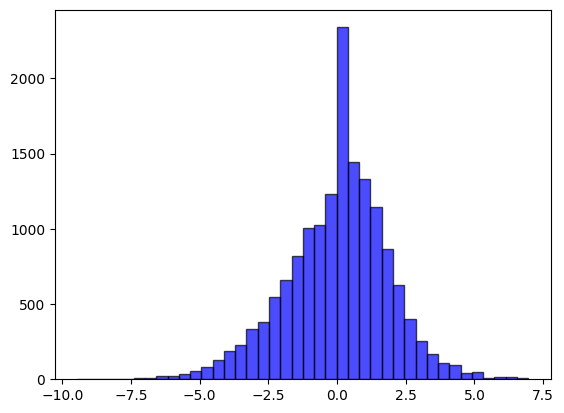

In [ ]:

plt.hist(model5.resid, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)


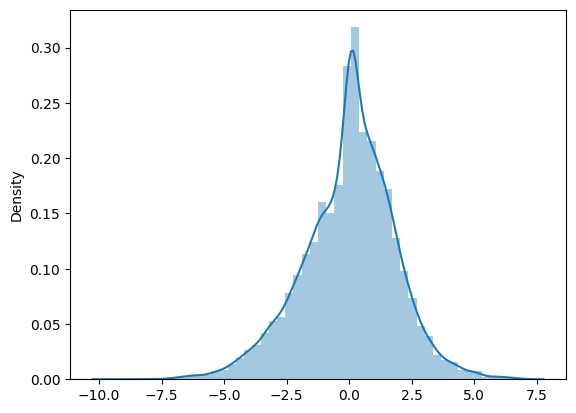

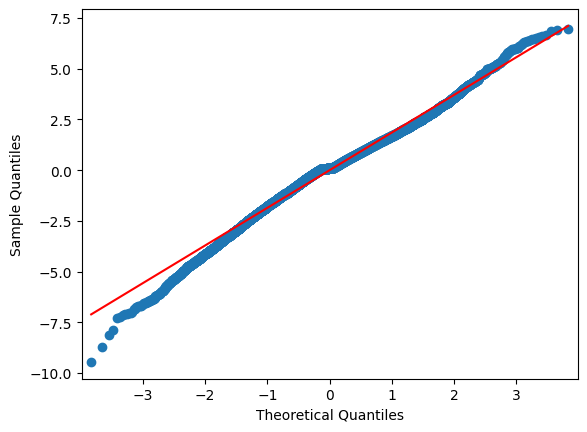

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model5.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法
sns.distplot(res)
plt.show()
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s') # 调用函数

plt.show()

# BOX-COX transformation

In [116]:
from scipy.stats import norm, skew #for some statistics
res2 = abs(res)
fig, ax = plt.subplots(figsize=[12,8])
converted_data1 = stats.boxcox(res2)[0] #对数据进行BOX-COX变换
sns.distplot(converted_data1)
plt.show()
fig, ax = plt.subplots(figsize=[12,8])
prob = stats.probplot(converted_data1, dist=stats.norm, plot=ax) #生成Q-Q图
plt.show()


NameError: name 'res' is not defined

<font face = "Time New Roman" size = 5 color =red> Model 2</font>

<font face = "Time New Roman" size = 5 color =red> Model 3</font>

In [ ]:
variables_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual_Donation_Amount  15979 non-null  float64
 1   Campaign_Goal           15979 non-null  int64  
 2   NPO_Tax_Deductibility   15979 non-null  int64  
 3   duration_day            15979 non-null  int64  
 4   Campaign_Image_num      15979 non-null  int64  
 5   Campaign_Video          15979 non-null  int64  
 6   Msg_category            15979 non-null  int64  
 7   Num_desc_cam            15979 non-null  int64  
 8   Num_desc_NPO            15979 non-null  int64  
 9   Org_causes              15979 non-null  int64  
 10  Cam_causes              15979 non-null  int64  
 11  Custom_Amount1          15979 non-null  int64  
 12  Custom_Amount2          15979 non-null  int64  
 13  Custom_Amount3          15979 non-null  int64  
 14  Custom_Amount4          15979 non-null

In [ ]:
model3 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + NPO_Tax_Deductibility + Campaign_Duration + \
    Campaign_Image_Number  + Campaign_Video + Msg_category+\
    Number_of_words_describing_campaign + Num_desc_NPO + Org_causes + Cam_causes', data = variables_data3).fit()

results3 = model3.summary()
print(results3)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.307
Model:                                OLS   Adj. R-squared:                  0.306
Method:                     Least Squares   F-statistic:                     706.9
Date:                    Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                            23:47:28   Log-Likelihood:            -1.9632e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15968   BIC:                         3.927e+05
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# Residuals

In [ ]:
model.resid

0        -6502.023006
1        -6383.130003
2       -10109.009621
3         3680.179976
4          -31.460896
             ...     
15974    -1809.426473
15975     -307.708669
15976     2575.192535
15977     1031.338847
15978    -4940.357032
Length: 15979, dtype: float64

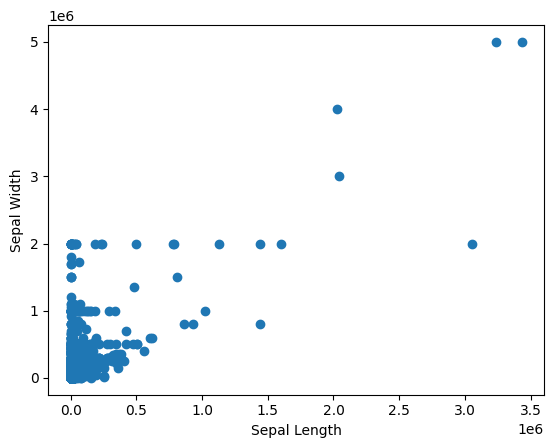

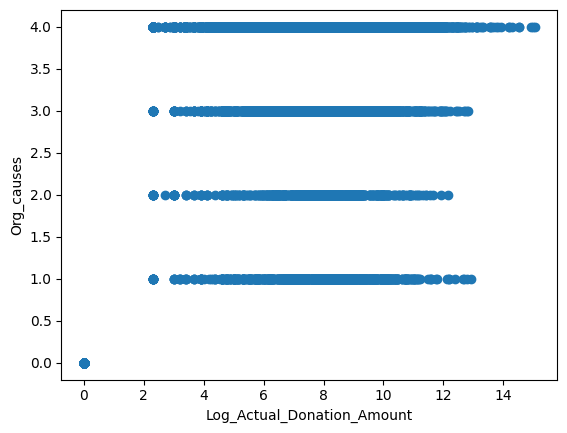

In [ ]:
#plt.figure(figsize=(15,15))

#plt.subplot(221)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign_Goal"])
#plt.xlim(0,30000)
#plt.ylim(0,30000)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.show()

#plt.subplot(222)
plt.scatter(extract_data["Log_Actual_Donation_Amount"], extract_data["Org_causes"])
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Org_causes')
plt.show()

In [112]:
import pandas as pd

df_X = extract_data[['Future_tense_percentage','Log_Actual_Donation_Amount','Campaign_frequency']]
          



In [113]:
df_X

,Future_tense_percentage,Log_Actual_Donation_Amount,Campaign_frequency
0,0.012048,8.623533,1
1,0.000000,7.940940,2
2,0.000000,7.019297,2
3,0.000000,7.937375,2
4,0.000000,7.615791,2
...,...,...,...
15974,0.000000,2.302585,2
15975,0.000000,5.010635,5
15976,0.000000,6.907755,5
15977,0.000000,4.787492,4


In [114]:
from pyprocessmacro import Process
p = Process(data=df_X, model=1, x="Future_tense_percentage", y="Log_Actual_Donation_Amount",m=["Campaign_frequency"],controls_in="all_to_y")
p.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 1

Variables:
    Cons = Cons
    x = Future_tense_percentage
    y = Log_Actual_Donation_Amount
    m = Campaign_frequency

Sample size:
15699

***************************** OUTCOME MODELS ****************************

Outcome = Log_Actual_Donation_Amount 
OLS Regression Summary

     R²  Adj. R²    MSE         F  df1    df2  p-value
 0.2588   0.2586 8.2532 1826.5842    3  15695   0.0000

Coefficients

                                             coeff     se        t      p    LLCI    ULCI
Cons                                        6.6715 0.0273 243.9914 0.0000  6.6179  6.7251
Future_tense_percentage                    18.3470 1.1770  15.5880 0.0000 16.0402 20.6539
Campaign_frequency                         -0.0068 0.0001 -68.9996 0.0000 -0.0070 -0.0066
Future_tense_percentage*Campaign_frequency 

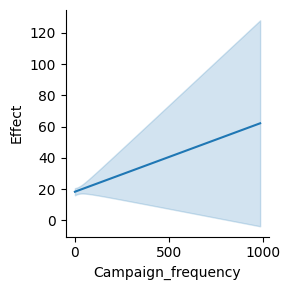

In [115]:
import matplotlib.pyplot as plt
g = p.plot_conditional_direct_effects(x = 'Campaign_frequency')
plt.show()

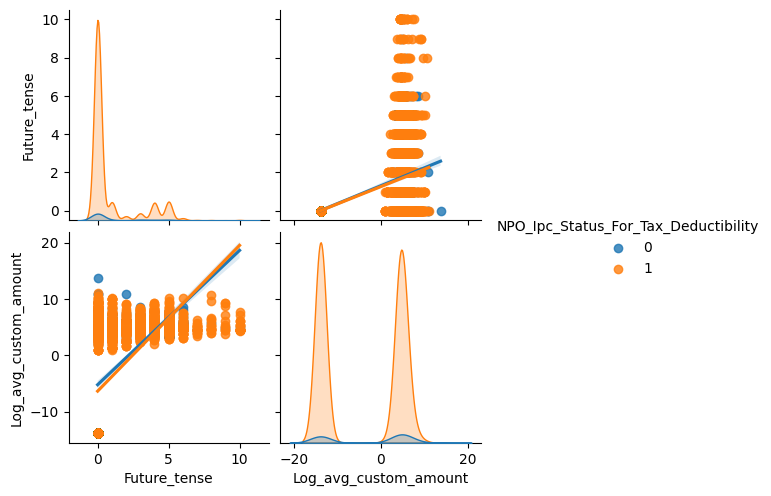

In [ ]:
import seaborn
seaborn.pairplot(extract_data, vars=['Future_tense','Log_avg_custom_amount'],   kind='reg', hue='NPO_Ipc_Status_For_Tax_Deductibility') 

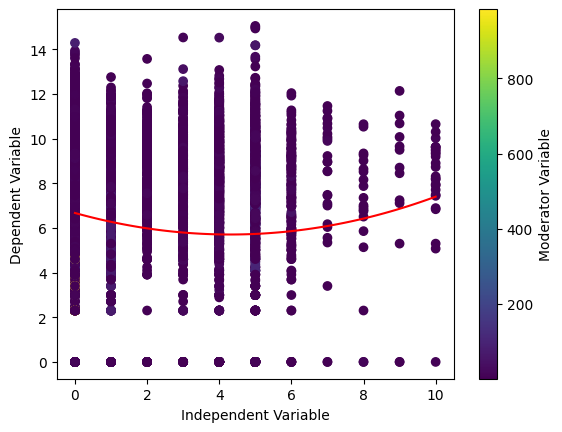

In [100]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = extract_data
extract_data['interaction_term'] = df['Future_tense'] * df['Campaign_frequency']\

X = sm.add_constant(df[['Future_tense', 'Campaign_frequency', 'interaction_term']])
model = sm.OLS(df['Log_Actual_Donation_Amount'], X).fit()

independent_vals = np.linspace(df['Future_tense'].min(), df['Future_tense'].max(), 100)
moderator_vals = np.linspace(df['Campaign_frequency'].min(), df['Campaign_frequency'].max(), 100)
interaction_vals = independent_vals * moderator_vals
new_data = pd.DataFrame({'Future_tense': independent_vals, 'Campaign_frequency': moderator_vals, 'interaction_term': interaction_vals})
new_data = sm.add_constant(new_data)
new_data['predicted_dependent_variable'] = model.predict(new_data)

fig, ax = plt.subplots()
scatter = ax.scatter(df['Future_tense'], df['Log_Actual_Donation_Amount'], c=df['Campaign_frequency'], cmap='viridis')
line = ax.plot(new_data['Future_tense'], new_data['predicted_dependent_variable'], color='red')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
fig.colorbar(scatter, label='Moderator Variable')
plt.show()




# 需要删除的没有用到的列

In [ ]:
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'

extract_data['Msg_category'] # 旧的分类

In [ ]:
# Output new csv file
extract_data.to_csv('Cleaned_data_model1.csv')

In [ ]:
'''
from random import sample
mysample = sample(range(0,Total_Rows), 50)
x = combined_data['Campaign Id'][mysample]
y = extract_data['Actual_Donation_Amount'][mysample]
y_fitted = model1.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted[mysample],'',label='OLS')
'''

KeyError: '[7656, 7553, 4486, 7349, 7610] not in index'

<font face = "Time New Roman" size = 5 color = red>Test normality. fellow normal distribution or not</font>

In [ ]:
import openturns as ot
from statsmodels.stats.diagnostic import lilliefors
model_resid = model1.resid
result = lilliefors(list(model_resid))
print(result)

(0.29990439794554413, 0.0009999999999998899)


In [ ]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(list(model_resid), dist='norm')
print('stat=%.3f' % (result.statistic))
print('significance_level:', (result.significance_level))

NameError: name 'model_resid' is not defined

(array([1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 8.000e+00,
        9.000e+00, 2.100e+01, 2.400e+01, 3.500e+01, 5.200e+01, 8.200e+01,
        1.290e+02, 1.880e+02, 2.300e+02, 3.370e+02, 3.820e+02, 5.440e+02,
        6.620e+02, 8.210e+02, 1.006e+03, 1.028e+03, 1.233e+03, 2.340e+03,
        1.442e+03, 1.329e+03, 1.147e+03, 8.660e+02, 6.260e+02, 4.020e+02,
        2.530e+02, 1.670e+02, 1.070e+02, 9.300e+01, 4.000e+01, 4.600e+01,
        1.100e+01, 1.700e+01, 1.200e+01, 6.000e+00]),
 array([-9.45521855, -9.04483924, -8.63445993, -8.22408061, -7.8137013 ,
        -7.40332198, -6.99294267, -6.58256336, -6.17218404, -5.76180473,
        -5.35142541, -4.9410461 , -4.53066678, -4.12028747, -3.70990816,
        -3.29952884, -2.88914953, -2.47877021, -2.0683909 , -1.65801158,
        -1.24763227, -0.83725296, -0.42687364, -0.01649433,  0.39388499,
         0.8042643 ,  1.21464361,  1.62502293,  2.03540224,  2.44578156,
         2.85616087,  3.26654019,  3.6769195 ,  4.08729881,  4.4

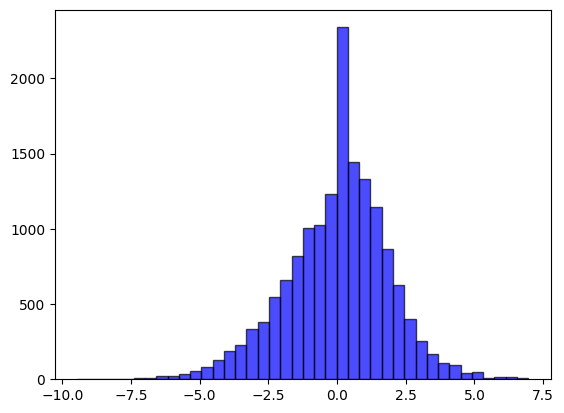

In [ ]:

plt.hist(model5.resid, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)


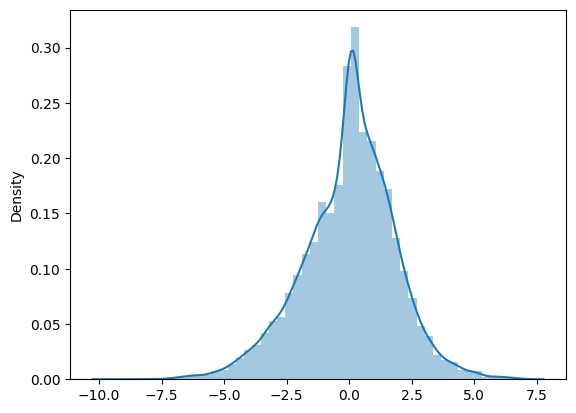

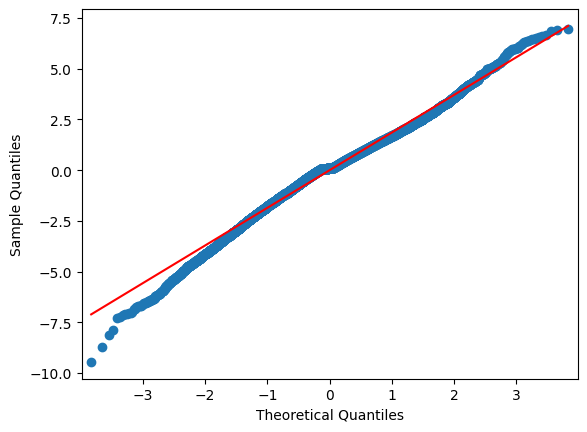

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

# 样例1

res = model5.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法
sns.distplot(res)
plt.show()
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s') # 调用函数

plt.show()

<font face = "Time New Roman" size = 5 color =red> Model 2</font>

In [ ]:
model_resid2 = model2.resid
result = lilliefors(list(model_resid2))
print(result)

(0.3166991231981999, 0.0009999999999998899)


In [ ]:
variables_data3

NameError: name 'variables_data3' is not defined

<font face = "Time New Roman" size = 5 color =red> Model 3</font>

In [ ]:
variables_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual_Donation_Amount  15979 non-null  float64
 1   Campaign_Goal           15979 non-null  int64  
 2   NPO_Tax_Deductibility   15979 non-null  int64  
 3   duration_day            15979 non-null  int64  
 4   Campaign_Image_num      15979 non-null  int64  
 5   Campaign_Video          15979 non-null  int64  
 6   Msg_category            15979 non-null  int64  
 7   Num_desc_cam            15979 non-null  int64  
 8   Num_desc_NPO            15979 non-null  int64  
 9   Org_causes              15979 non-null  int64  
 10  Cam_causes              15979 non-null  int64  
 11  Custom_Amount1          15979 non-null  int64  
 12  Custom_Amount2          15979 non-null  int64  
 13  Custom_Amount3          15979 non-null  int64  
 14  Custom_Amount4          15979 non-null

# Residuals

In [ ]:
model.resid

0        -6502.023006
1        -6383.130003
2       -10109.009621
3         3680.179976
4          -31.460896
             ...     
15974    -1809.426473
15975     -307.708669
15976     2575.192535
15977     1031.338847
15978    -4940.357032
Length: 15979, dtype: float64

Author: Guo Shiping
Created by 27/Jan/2023

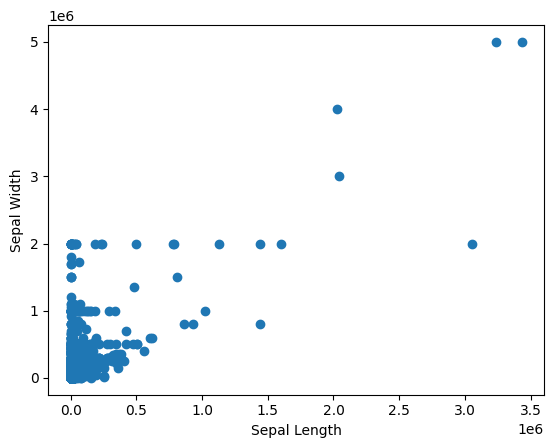

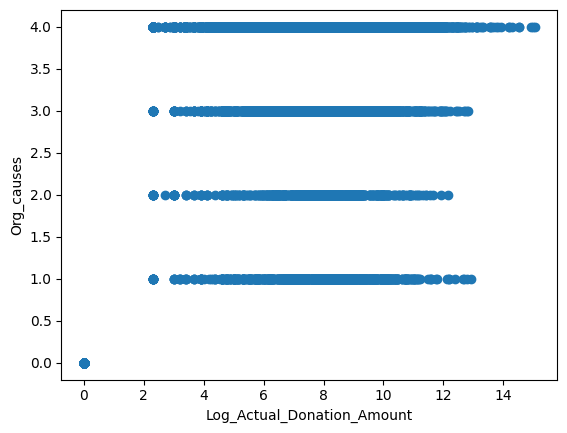

In [ ]:
#plt.figure(figsize=(15,15))

#plt.subplot(221)
plt.scatter(extract_data["Actual_Donation_Amount"], extract_data["Campaign_Goal"])
#plt.xlim(0,30000)
#plt.ylim(0,30000)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.show()

#plt.subplot(222)
plt.scatter(extract_data["Log_Actual_Donation_Amount"], extract_data["Org_causes"])
plt.xlabel('Log_Actual_Donation_Amount'); plt.ylabel('Org_causes')
plt.show()

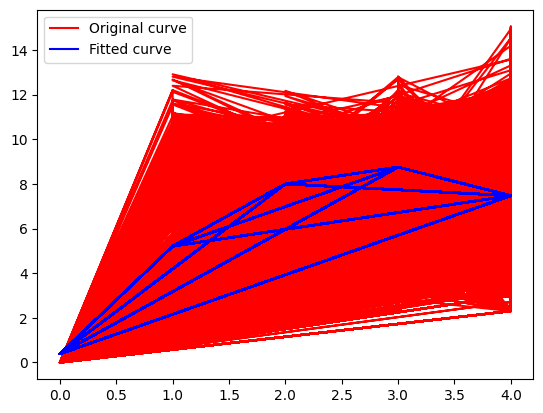

[-1.01730354  5.84063351  0.38525798]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Fun(x,a1,a2,a3):                   # 定义拟合函数形式
    return a1*x**2+a2*x+a3

x = extract_data["Org_causes"] # 创建时间序列
a1,a2,a3 = [-2,5,10] # 原始数据的参数

y = extract_data["Log_Actual_Donation_Amount"] # 加上噪声的序列

para,pcov=curve_fit(Fun,x,y)
y_fitted = Fun(x,para[0],para[1],para[2]) # 画出拟合后的曲线

plt.figure
plt.plot(x,y,'r', label = 'Original curve')
plt.plot(x, y_fitted,'-b', label ='Fitted curve')
plt.legend()
plt.show()
print (para)